# **Assignment**

In [36]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

## **Loading the files**

In [37]:
# reading the data files
test=pd.read_csv('/content/psm_test.csv')
labels=pd.read_csv('/content/psm_test_label.csv')

In [14]:
labels.head()

timestamp_(min)  label
0         132480.0      0
1         132481.0      0
2         132482.0      0
3         132483.0      0
4         132484.0      0

In [60]:
test.head()

timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0         132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1         132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2         132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3         132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4         132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   

   feature_5  feature_6  feature_7  feature_8  ...  feature_15  feature_16  \
0   0.426717   0.471591   0.434668   0.479511  ...    0.400617    0.480444   
1   0.442545   0.505682   0.448640   0.499451  ...    0.396902    0.500213   
2   0.433682   0.477273   0.450906   0.487223  ...    0.389270    0.487982   
3   0.435581   0.482955   0.454683   0.490431  ...    0.403780    0.491253   
4   0.436214   0.477273   0.449396   0.494671  ...    0.403636    0.495947   

   feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  \
0    0.588670    0.404036    0.638957    0.020236    0.042705    0.173375   
1    0.587041    0.421605    0.637865    0.018550    0.042705    0.191826   
2    0.582404    0.407393    0.636091    0.018550    0.039146    0.188361   
3    0.584660    0.407141    0.638138    0.020236    0.042705    0.186975   
4    0.581527    0.402761    0.632678    0.021922    0.042705    0.156325   

   feature_23  feature_24  
0    0.008715    0.105991  
1    0.010893    0.110599  
2    0.010893    0.115207  
3    0.013072    0.110599  
4    0.008715    0.110599  

[5 rows x 26 columns]

## **Merging the two dataframes on the timestamp column**

In [38]:
data=pd.merge(test,labels,on='timestamp_(min)',how='inner')

In [17]:
data.head()

timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0         132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1         132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2         132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3         132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4         132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   

   feature_5  feature_6  feature_7  feature_8  ...  feature_16  feature_17  \
0   0.426717   0.471591   0.434668   0.479511  ...    0.480444    0.588670   
1   0.442545   0.505682   0.448640   0.499451  ...    0.500213    0.587041   
2   0.433682   0.477273   0.450906   0.487223  ...    0.487982    0.582404   
3   0.435581   0.482955   0.454683   0.490431  ...    0.491253    0.584660   
4   0.436214   0.477273   0.449396   0.494671  ...    0.495947    0.581527   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0    0.404036    0.638957    0.020236    0.042705    0.173375    0.008715   
1    0.421605    0.637865    0.018550    0.042705    0.191826    0.010893   
2    0.407393    0.636091    0.018550    0.039146    0.188361    0.010893   
3    0.407141    0.638138    0.020236    0.042705    0.186975    0.013072   
4    0.402761    0.632678    0.021922    0.042705    0.156325    0.008715   

   feature_24  label  
0    0.105991      0  
1    0.110599      0  
2    0.115207      0  
3    0.110599      0  
4    0.110599      0  

[5 rows x 27 columns]

In [18]:
# exploring the dataset
print('Shape of the dataset:',data.shape)

Shape of the dataset: (87841, 27)


In [19]:
# descriptive stats
data.describe()

timestamp_(min)     feature_0     feature_1     feature_2  \
count     87841.000000  87841.000000  87841.000000  87841.000000   
mean     176400.000000      0.829105      0.857500      0.622801   
std       25357.656835      0.047640      0.073858      0.031606   
min      132480.000000      0.521701      0.387415      0.453511   
25%      154440.000000      0.795859      0.809958      0.604902   
50%      176400.000000      0.825835      0.867525      0.616689   
75%      198360.000000      0.861815      0.914453      0.636475   
max      220320.000000      0.928893      1.000000      0.720898   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  87841.000000  87841.000000  87841.000000  87841.000000  87841.000000   
mean       0.652205      0.516833      0.482637      0.539184      0.520756   
std        0.171261      0.077901      0.069440      0.054200      0.069604   
min        0.331163      0.073765      0.117442      0.193182      0.080438   
25%        0.548472      0.463117      0.433682      0.502273      0.474320   
50%        0.585220      0.519564      0.480848      0.534091      0.519637   
75%        0.671173      0.573124      0.529915      0.568182      0.567221   
max        1.000000      1.000000      1.000000      0.880682      1.000000   

          feature_8  ...    feature_16    feature_17    feature_18  \
count  87841.000000  ...  87841.000000  87841.000000  87841.000000   
mean       0.528672  ...      0.530528      0.611334      0.426030   
std        0.072979  ...      0.071854      0.043456      0.049188   
min        0.036741  ...      0.077798      0.393533      0.117788   
25%        0.481604  ...      0.483288      0.581527      0.394623   
50%        0.531086  ...      0.533210      0.605214      0.422243   
75%        0.575146  ...      0.576874      0.640682      0.453484   
max        1.000000  ...      1.000000      1.000000      0.761031   

         feature_19    feature_20    feature_21    feature_22    feature_23  \
count  87841.000000  87841.000000  87841.000000  87841.000000  87841.000000   
mean       0.640173      0.010739      0.014477      0.209236      0.013991   
std        0.043308      0.010034      0.017572      0.033675      0.006031   
min        0.424242      0.000000      0.000000      0.132879      0.000000   
25%        0.615479      0.005059      0.000000      0.183885      0.010893   
50%        0.640186      0.010118      0.007117      0.205642      0.013072   
75%        0.661070      0.015177      0.024911      0.230517      0.015251   
max        0.895987      0.994941      1.000000      0.554052      0.091503   

         feature_24         label  
count  87841.000000  87841.000000  
mean       0.174961      0.277558  
std        0.057975      0.447797  
min        0.023041      0.000000  
25%        0.133641      0.000000  
50%        0.170507      0.000000  
75%        0.211982      1.000000  
max        0.990783      1.000000  

[8 rows x 27 columns]

In [ ]:
# checking for missing values
data.isnull().sum() #no missing values

In [21]:
# checking for duplicated values
data.duplicated().sum()

0

# **Regions with anomaly**

In [30]:
anomaly_regions=data.loc[data['label']==1]

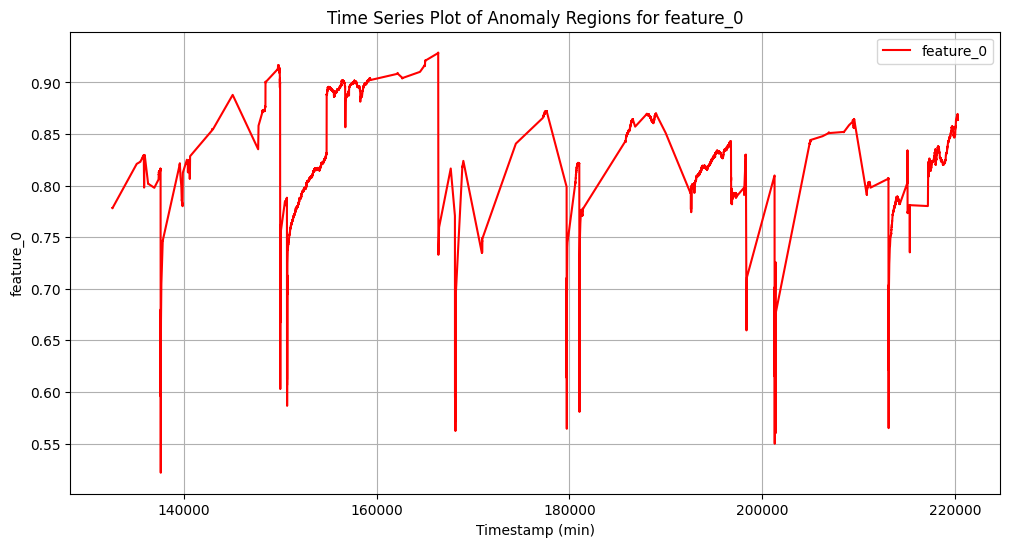

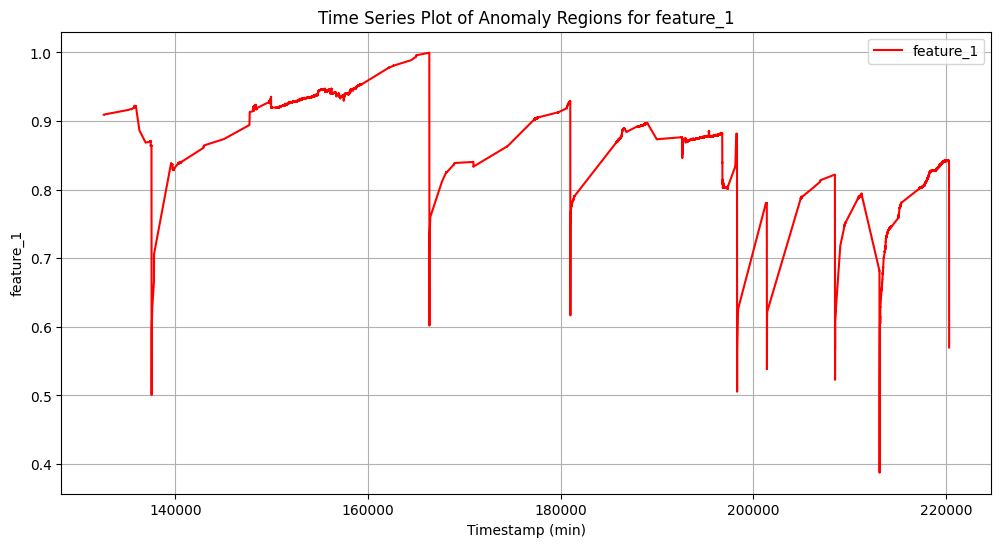

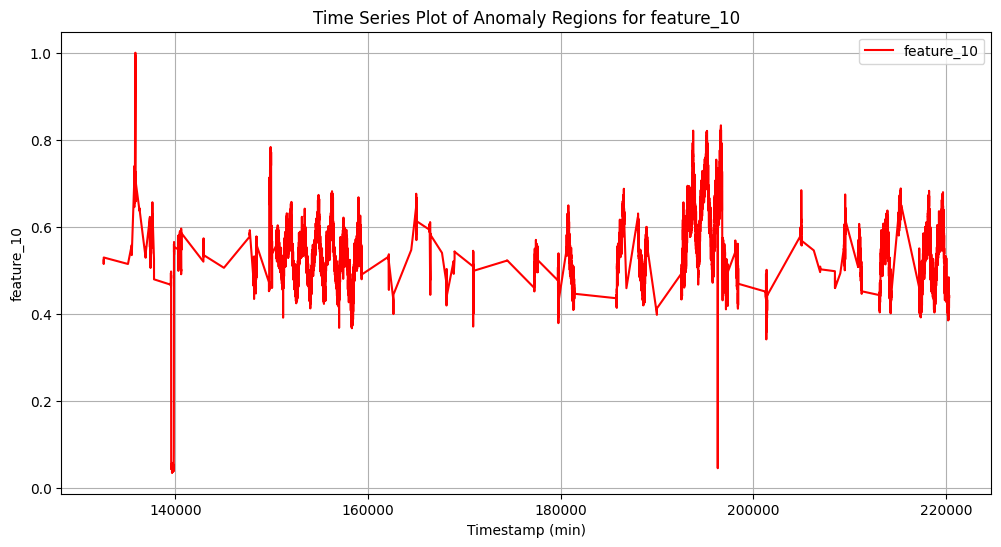

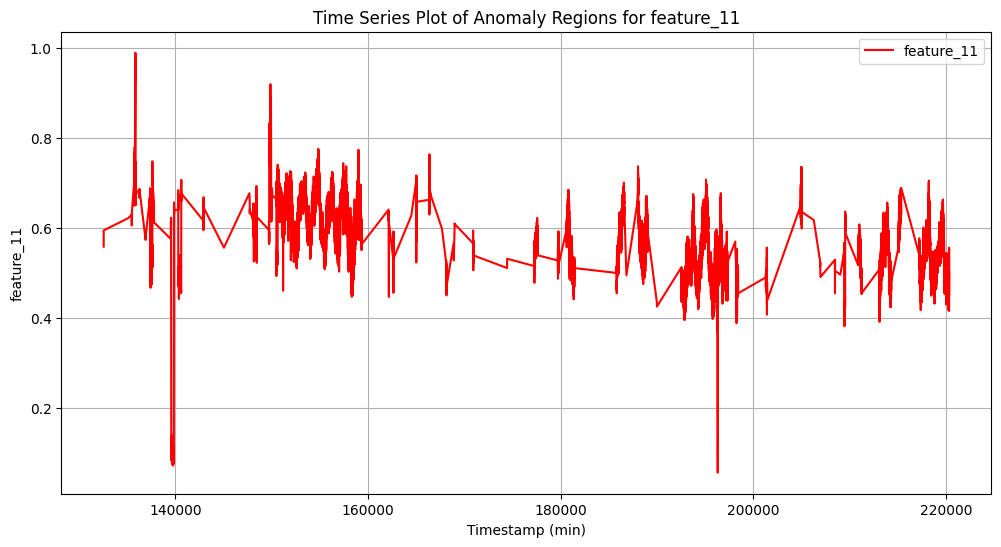

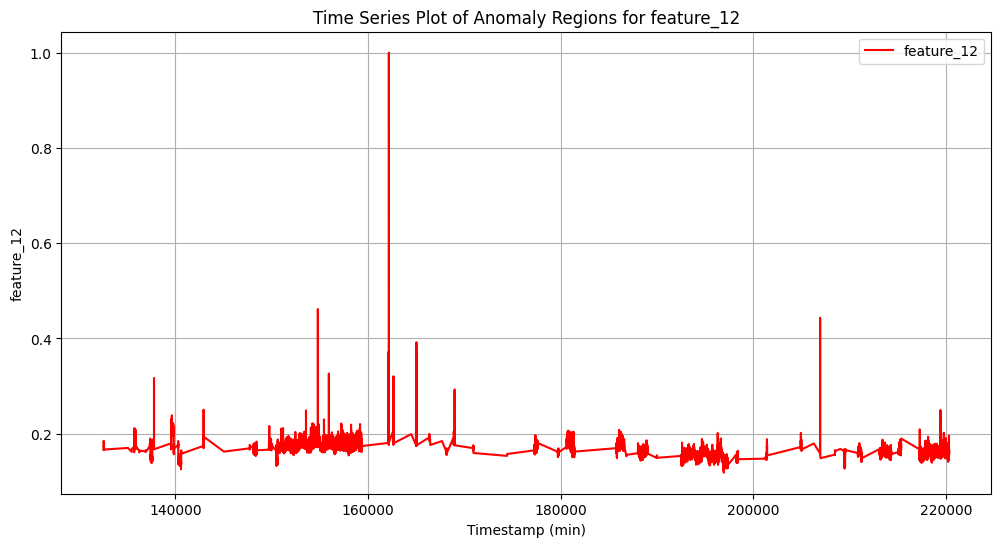

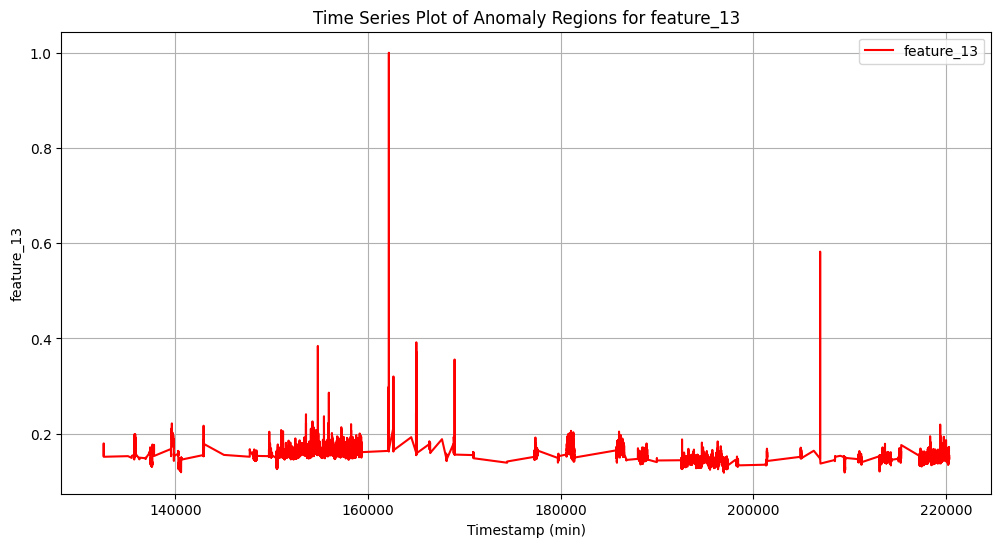

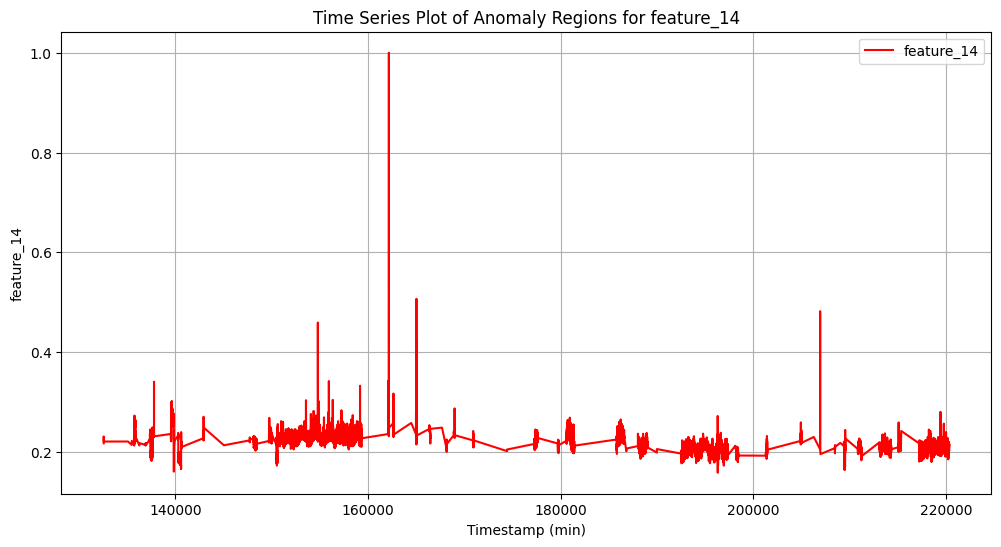

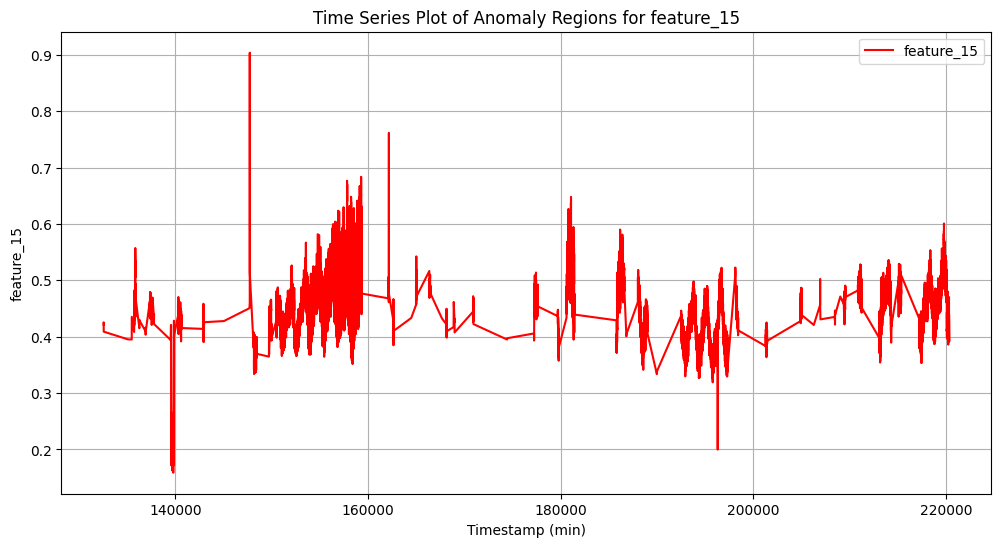

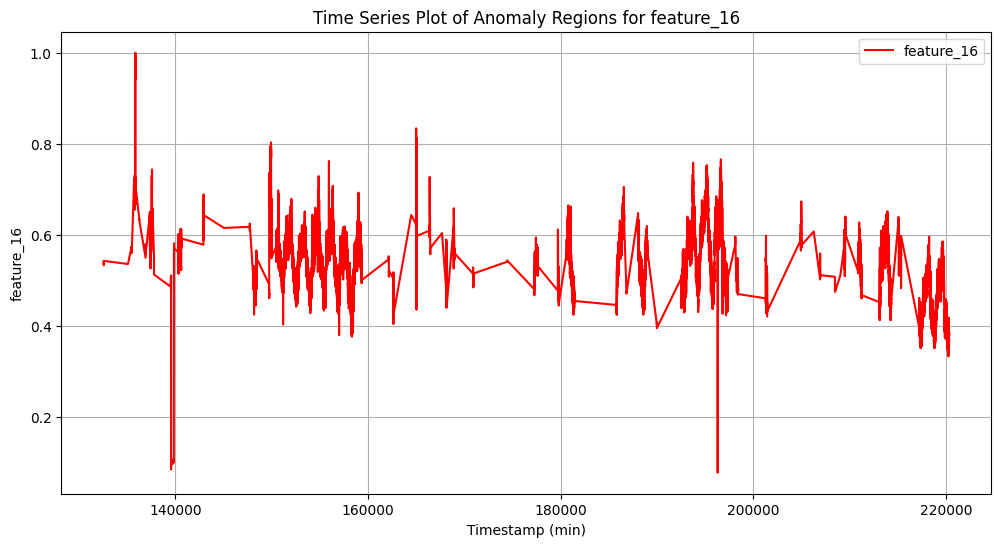

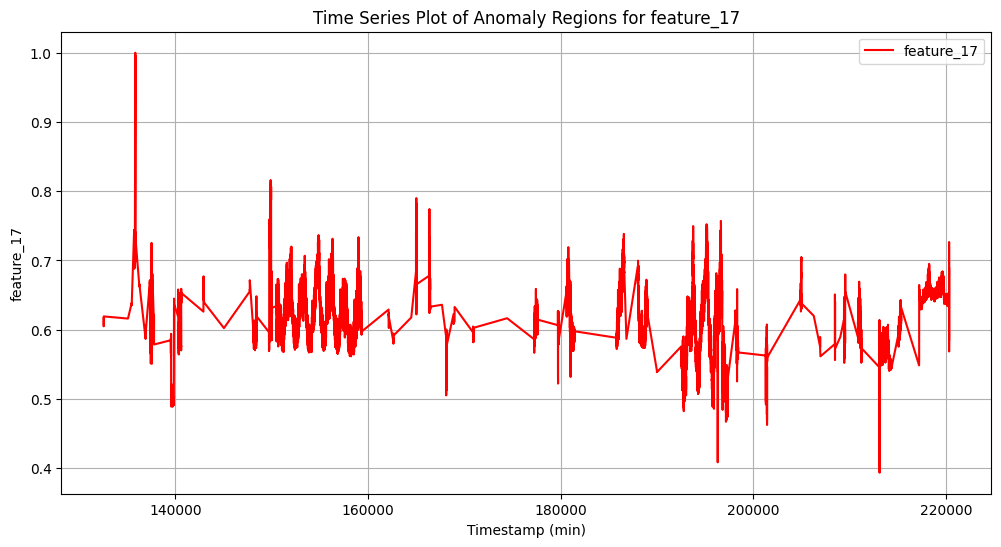

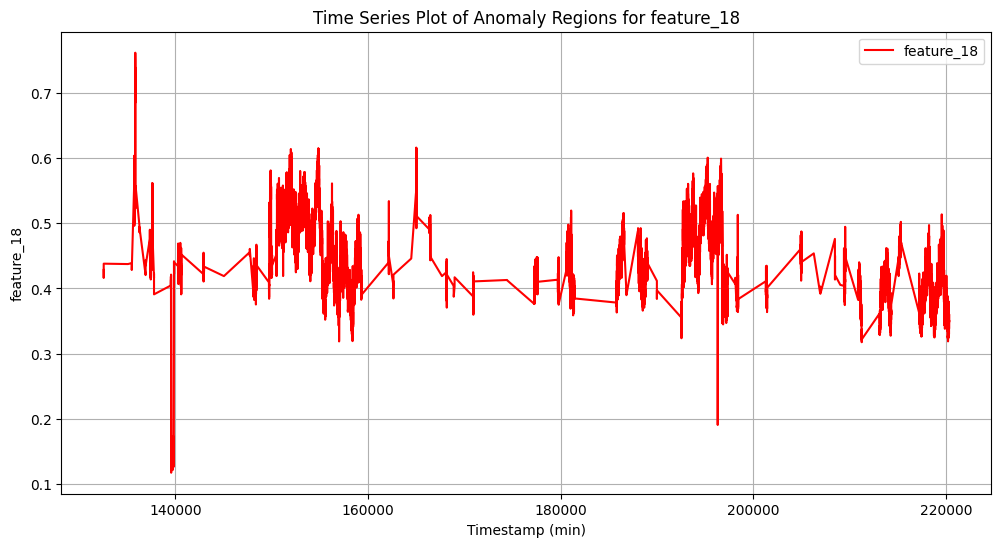

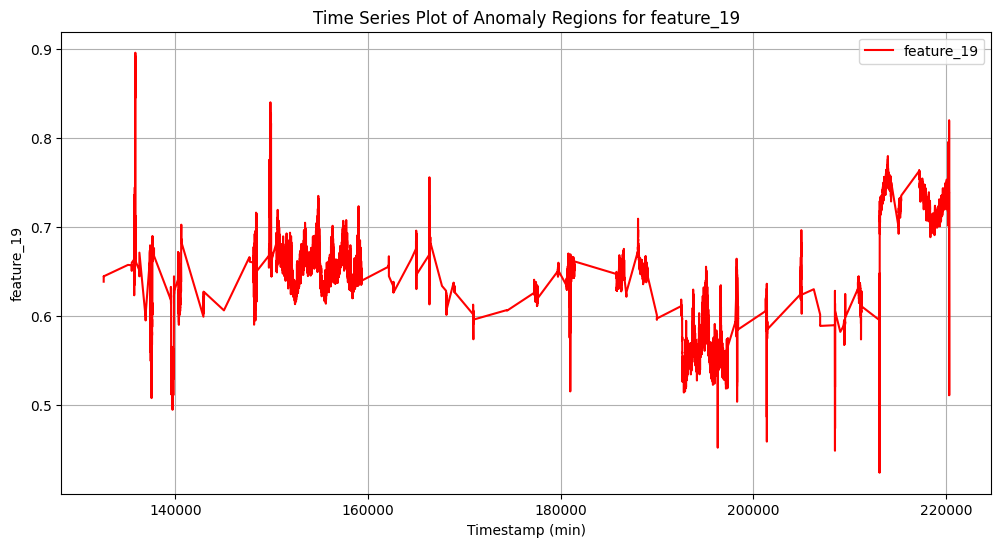

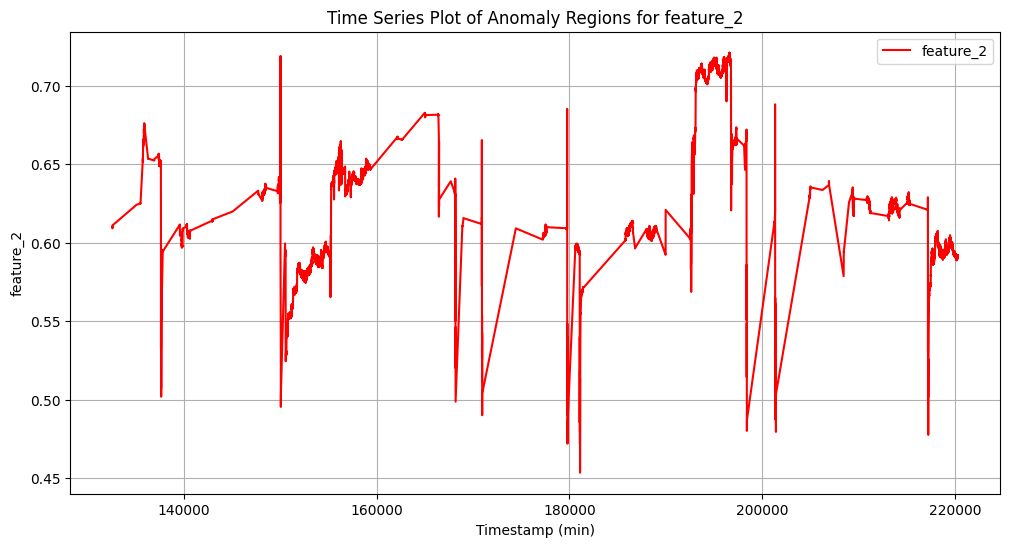

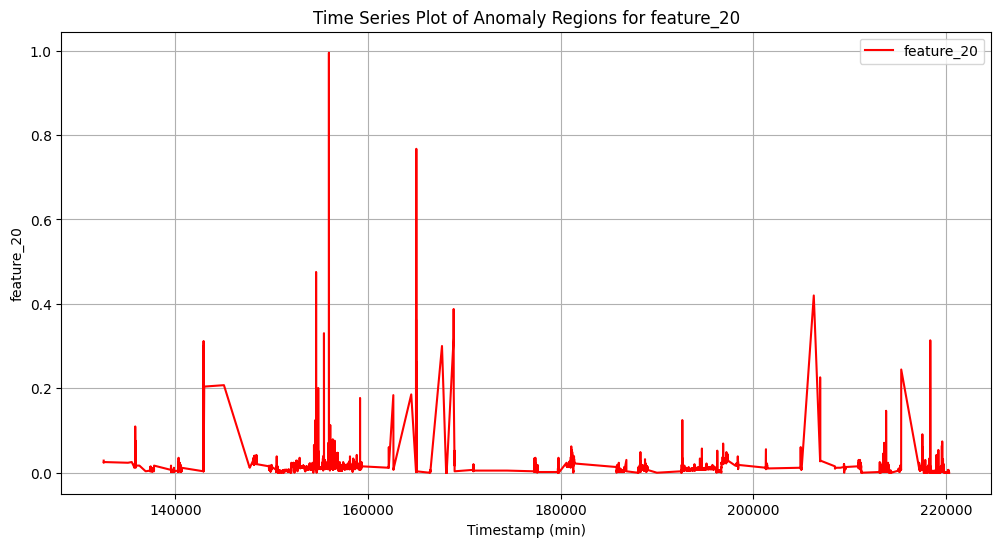

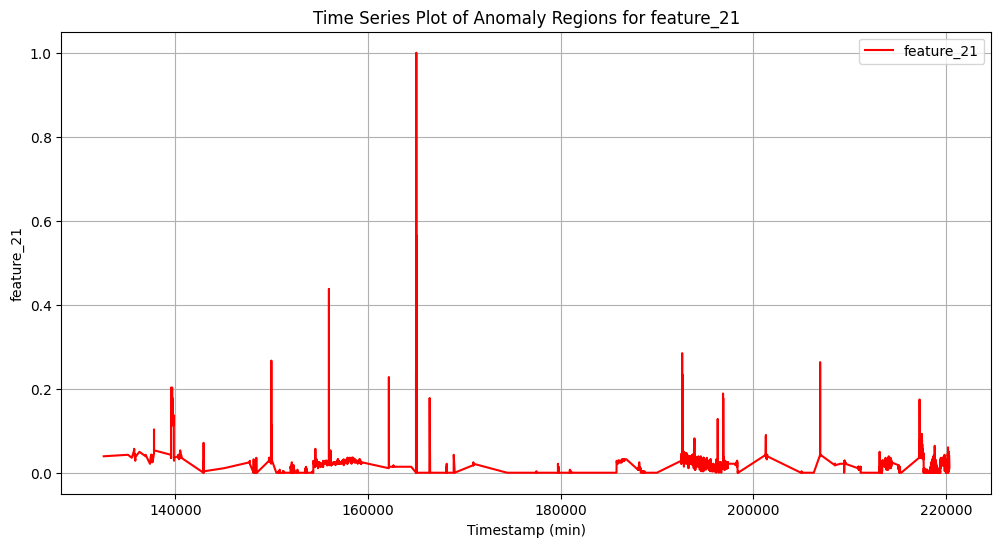

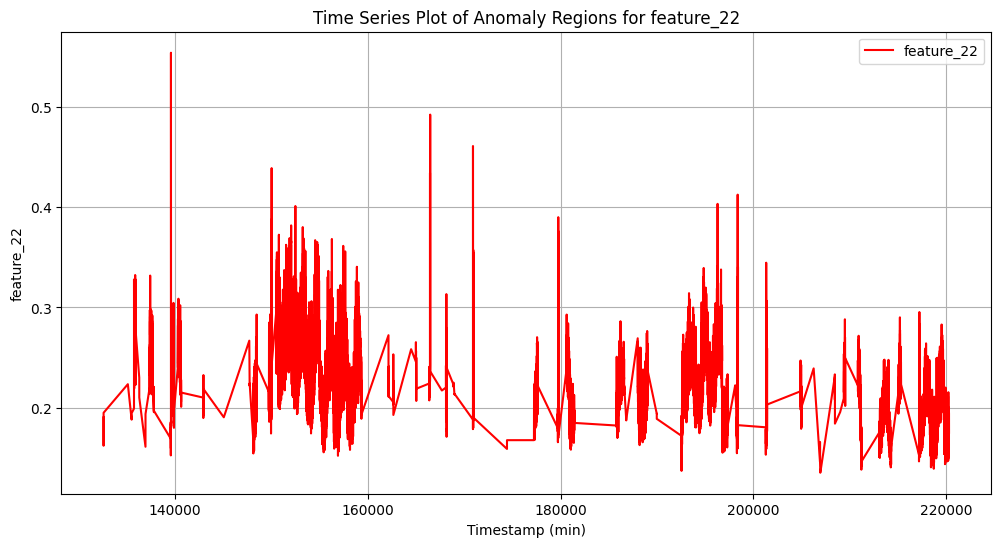

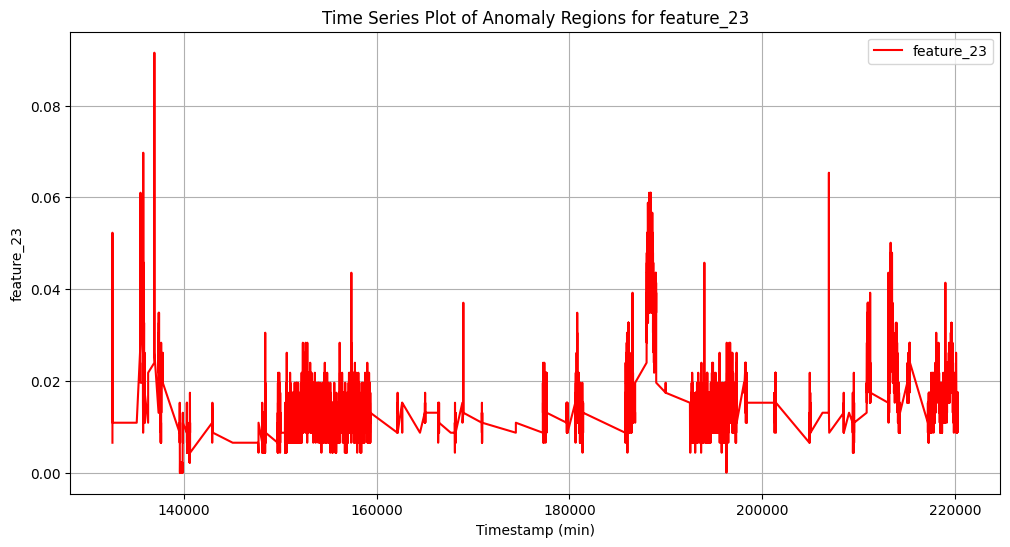

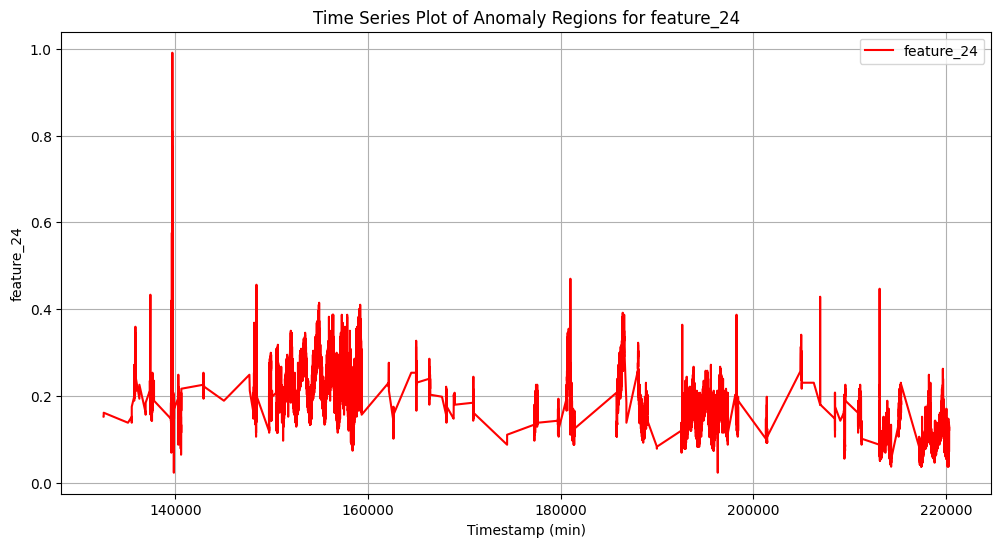

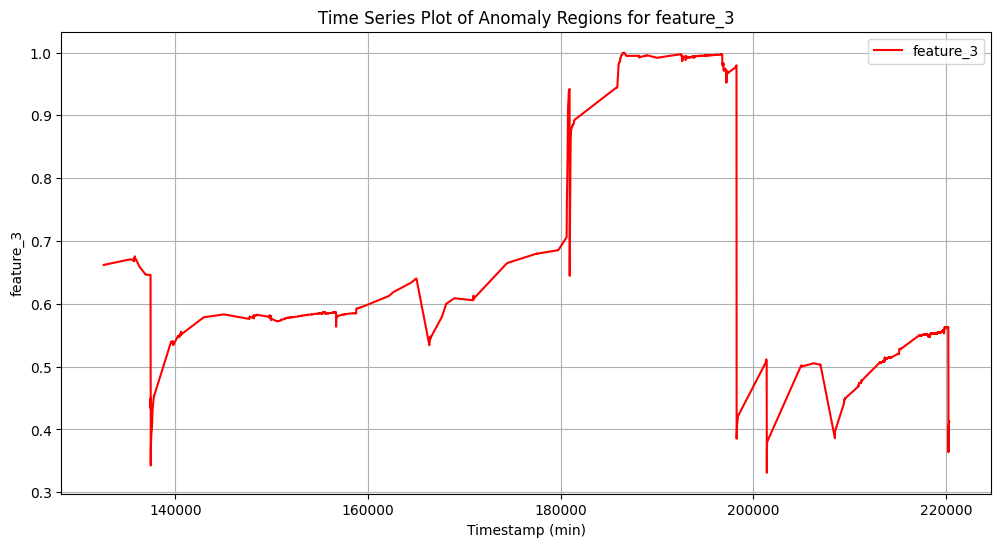

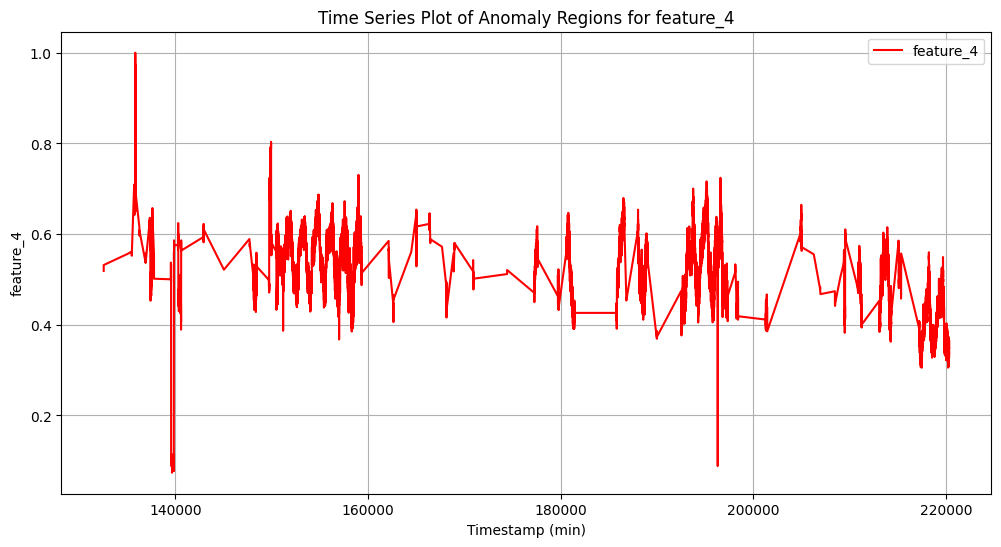

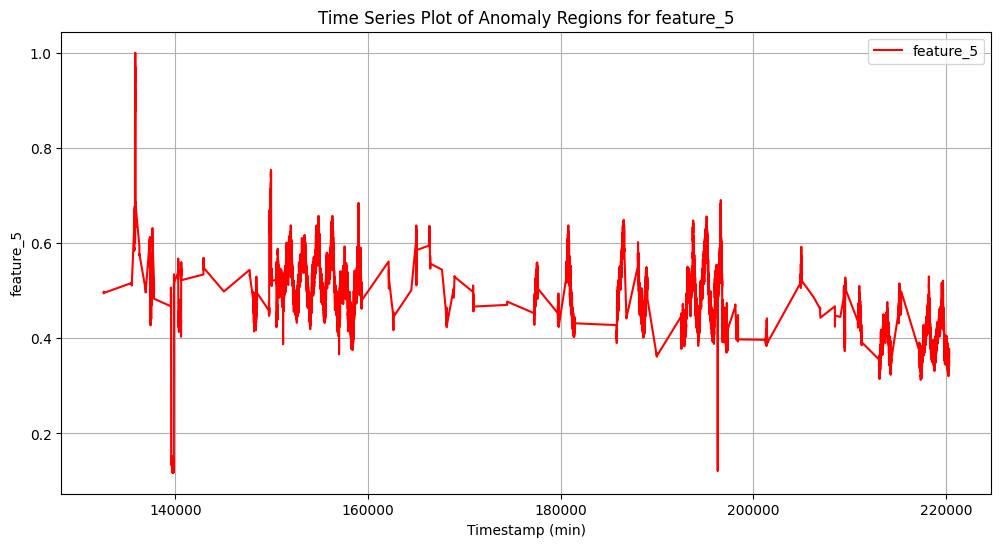

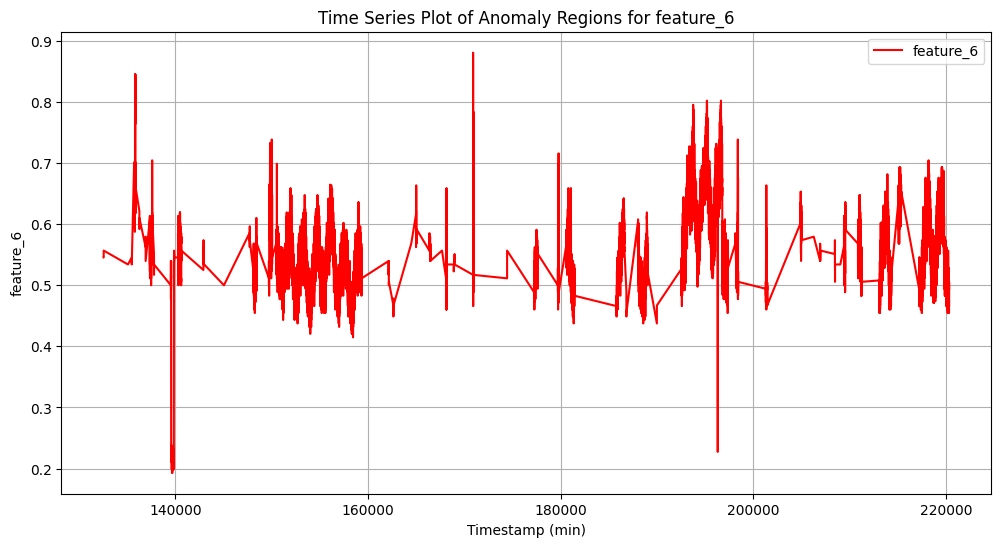

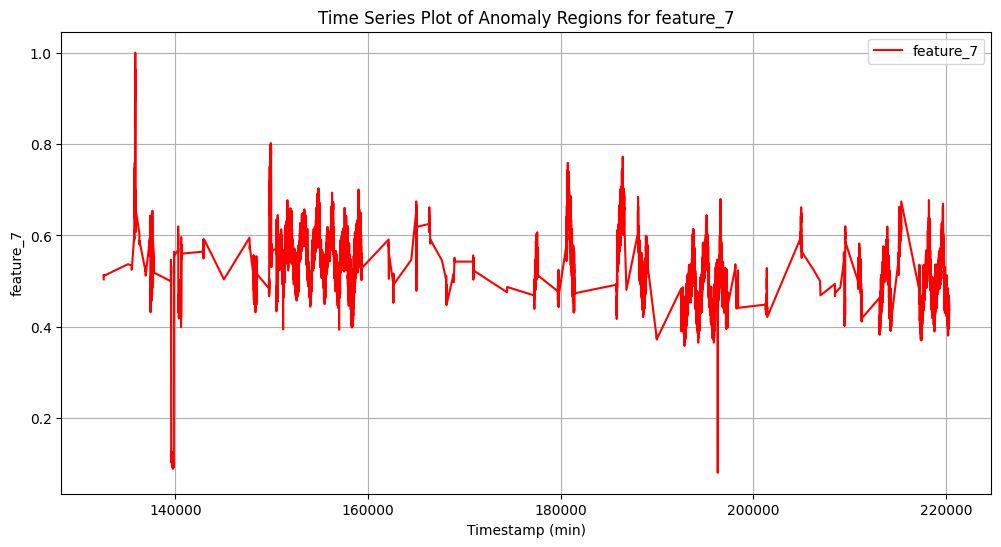

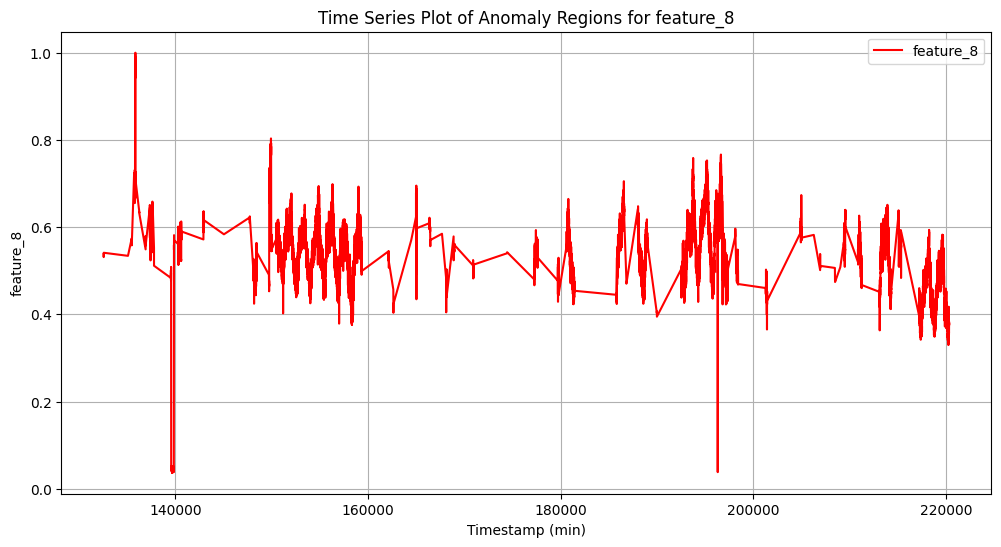

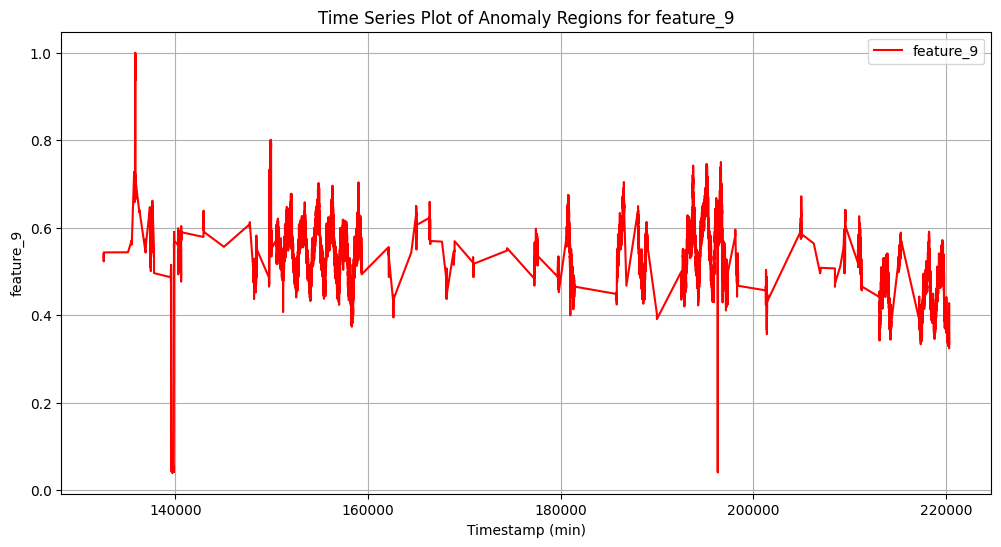

In [34]:
# Get all column names except 'timestamp_(min)' and 'label'
columns_to_plot = anomaly_regions.columns.difference(['timestamp_(min)', 'label'])
# Plot each feature separately
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(anomaly_regions['timestamp_(min)'], anomaly_regions[column], label=column, color='red')
    plt.xlabel('Timestamp (min)')
    plt.ylabel(column)
    plt.title('Time Series Plot of Anomaly Regions for {}'.format(column))
    plt.legend()
    plt.grid(True)
    plt.show()

## **Exploratory Data Analysis**

### **1. Descriptive Statistics:**

The descriptive statistics provide a comparison between normal and anomaly regions for each feature.
We can look for features where there are significant differences in mean, standard deviation, or percentiles between normal and anomaly regions. These differences could indicate potential factors contributing to anomalies.

In [39]:
# Descriptive statistics for normal regions
normal_stats = data[data['label'] == 0].describe()

# Descriptive statistics for anomaly regions
anomaly_stats = data[data['label'] == 1].describe()

In [40]:
print('normal stats')
normal_stats

normal stats


timestamp_(min)     feature_0     feature_1     feature_2  \
count     63460.000000  63460.000000  63460.000000  63460.000000   
mean     175216.960258      0.828680      0.850587      0.621907   
std       24957.427323      0.047664      0.074050      0.023943   
min      132480.000000      0.556808      0.536428      0.469519   
25%      150190.750000      0.794380      0.803197      0.607259   
50%      175138.500000      0.826926      0.853654      0.616703   
75%      199033.250000      0.859074      0.901428      0.630893   
max      220320.000000      0.928893      1.000000      0.689340   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  63460.000000  63460.000000  63460.000000  63460.000000  63460.000000   
mean       0.637074      0.517948      0.483702      0.533890      0.520811   
std        0.158330      0.071087      0.063855      0.044076      0.062828   
min        0.373466      0.309493      0.298829      0.420455      0.312689   
25%        0.518691      0.463438      0.435264      0.500000      0.475453   
50%        0.600168      0.519564      0.480848      0.534091      0.519637   
75%        0.669142      0.571520      0.529915      0.562500      0.564955   
max        1.000000      0.752405      0.717316      0.726136      0.765106   

          feature_8  ...    feature_16    feature_17    feature_18  \
count  63460.000000  ...  63460.000000  63460.000000  63460.000000   
mean       0.527886  ...      0.529488      0.609003      0.419911   
std        0.064373  ...      0.064516      0.040361      0.039064   
min        0.325327  ...      0.333381      0.495425      0.305614   
25%        0.480604  ...      0.482150      0.579897      0.393156   
50%        0.528704  ...      0.530792      0.601579      0.417941   
75%        0.572355  ...      0.574314      0.635167      0.444966   
max        0.759300  ...      0.759209      0.759744      0.608985   

         feature_19    feature_20    feature_21    feature_22    feature_23  \
count  63460.000000  63460.000000  63460.000000  63460.000000  63460.000000   
mean       0.637677      0.011014      0.013034      0.204024      0.013564   
std        0.034087      0.008250      0.015618      0.030292      0.005087   
min        0.490718      0.000000      0.000000      0.132879      0.002179   
25%        0.615206      0.005059      0.000000      0.181388      0.010893   
50%        0.636773      0.010118      0.003559      0.200986      0.013072   
75%        0.656566      0.016863      0.024911      0.223905      0.015251   
max        0.835244      0.165261      0.174377      0.358589      0.058824   

         feature_24    label  
count  63460.000000  63460.0  
mean       0.172880      0.0  
std        0.053303      0.0  
min        0.032258      0.0  
25%        0.133641      0.0  
50%        0.170507      0.0  
75%        0.207373      0.0  
max        0.525346      0.0  

[8 rows x 27 columns]

In [41]:
print('anomaly stats')
anomaly_stats

anomaly stats


timestamp_(min)     feature_0     feature_1     feature_2  \
count     24381.000000  24381.000000  24381.000000  24381.000000   
mean     179479.270826      0.830213      0.875492      0.625127   
std       26121.411619      0.047561      0.070238      0.045821   
min      132569.000000      0.521701      0.387415      0.453511   
25%      154720.000000      0.802332      0.837054      0.592718   
50%      181404.000000      0.824812      0.880695      0.616465   
75%      196762.000000      0.866796      0.933078      0.647898   
max      220314.000000      0.928855      0.999666      0.720898   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  24381.000000  24381.000000  24381.000000  24381.000000  24381.000000   
mean       0.691589      0.513931      0.479867      0.552964      0.520613   
std        0.195649      0.093271      0.082154      0.072557      0.084737   
min        0.331163      0.073765      0.117442      0.193182      0.080438   
25%        0.562599      0.461835      0.429250      0.511364      0.471299   
50%        0.583923      0.519243      0.480215      0.545455      0.520015   
75%        0.971837      0.577614      0.530548      0.596591      0.572885   
max        0.999657      1.000000      1.000000      0.880682      1.000000   

          feature_8  ...    feature_16    feature_17    feature_18  \
count  24381.000000  ...  24381.000000  24381.000000  24381.000000   
mean       0.530718  ...      0.533235      0.617402      0.441955   
std        0.091637  ...      0.088077      0.050129      0.066289   
min        0.036741  ...      0.077798      0.393533      0.117788   
25%        0.483919  ...      0.486275      0.587417      0.400619   
50%        0.538576  ...      0.540464      0.616493      0.438015   
75%        0.581815  ...      0.583132      0.649079      0.489097   
max        1.000000  ...      1.000000      1.000000      0.761031   

         feature_19    feature_20    feature_21    feature_22    feature_23  \
count  24381.000000  24381.000000  24381.000000  24381.000000  24381.000000   
mean       0.646670      0.010022      0.018233      0.222800      0.015104   
std        0.060620      0.013597      0.021403      0.037980      0.007872   
min        0.424242      0.000000      0.000000      0.135203      0.000000   
25%        0.618482      0.005059      0.000000      0.193876      0.010893   
50%        0.649877      0.008432      0.017794      0.220469      0.013072   
75%        0.677860      0.013491      0.028470      0.247567      0.017429   
max        0.895987      0.994941      1.000000      0.554052      0.091503   

         feature_24    label  
count  24381.000000  24381.0  
mean       0.180377      1.0  
std        0.068366      0.0  
min        0.023041      1.0  
25%        0.129032      1.0  
50%        0.170507      1.0  
75%        0.225806      1.0  
max        0.990783      1.0  

[8 rows x 27 columns]

## **2. Histograms for normal and anomaly regions**

By comparing the histograms for normal and anomaly regions, we can identify any differences in the distributions that may help us understand the characteristics of anomalies.

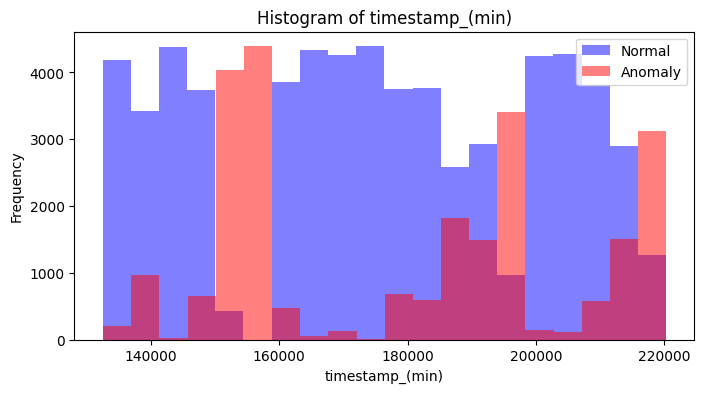

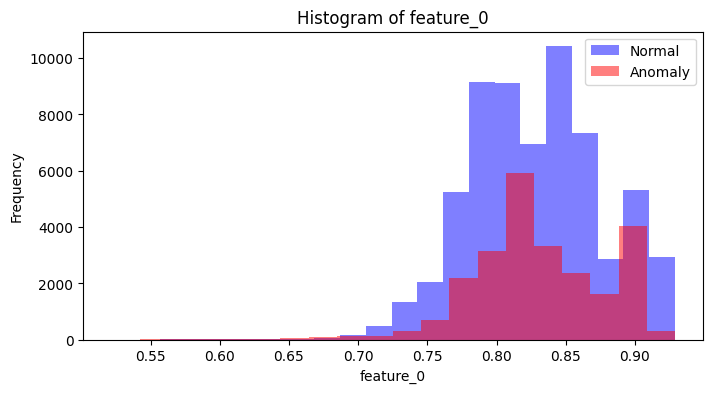

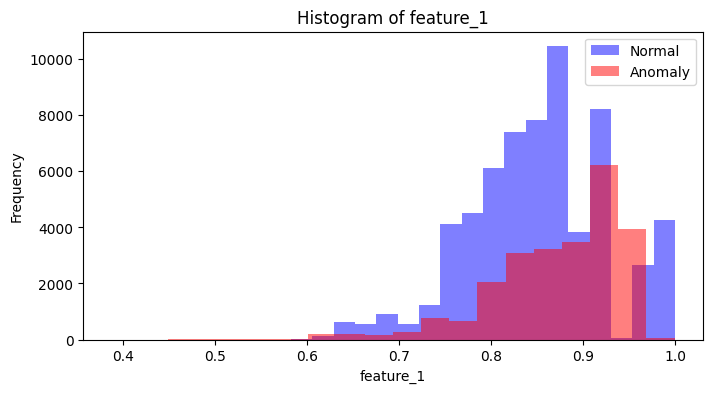

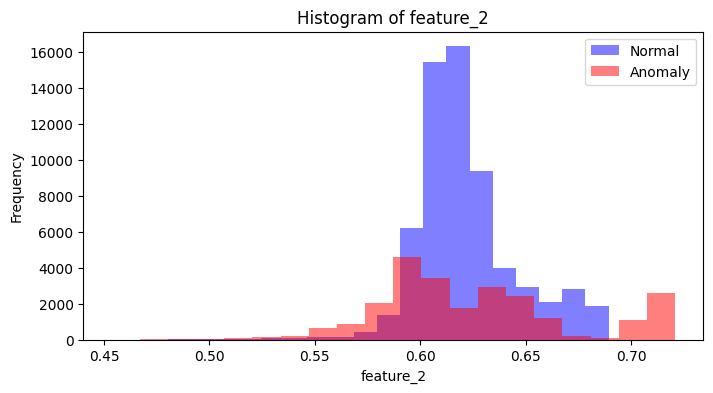

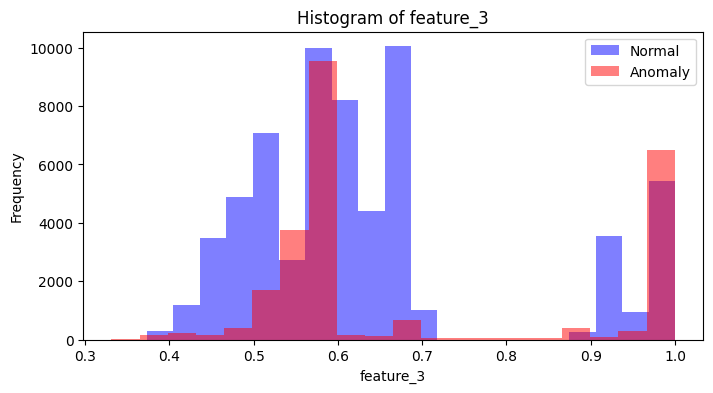

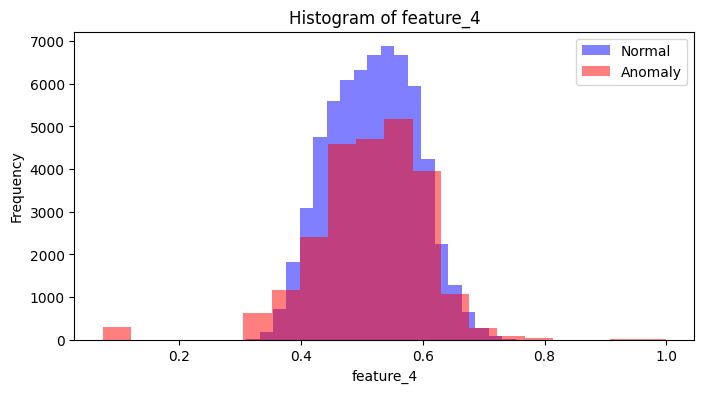

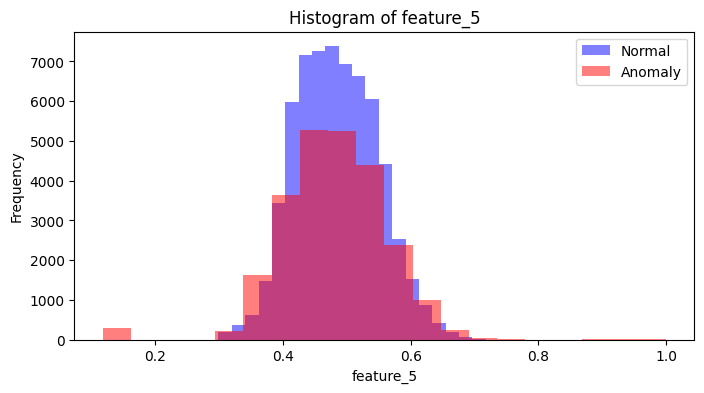

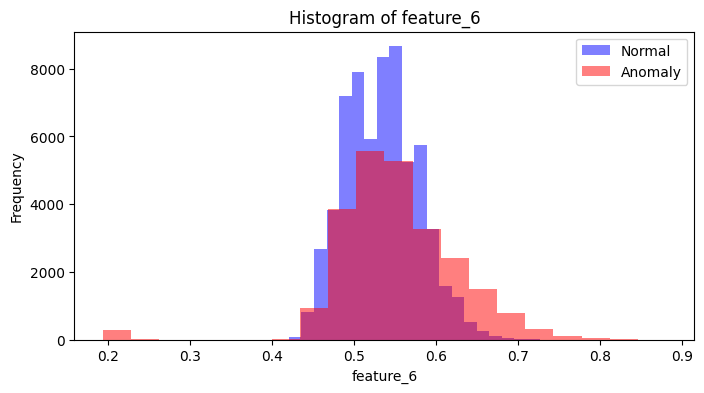

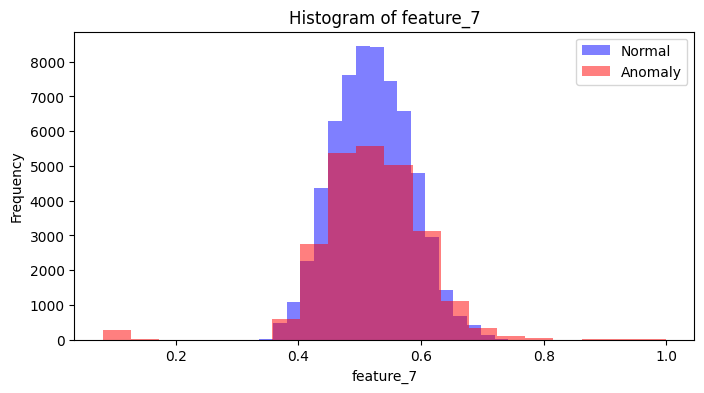

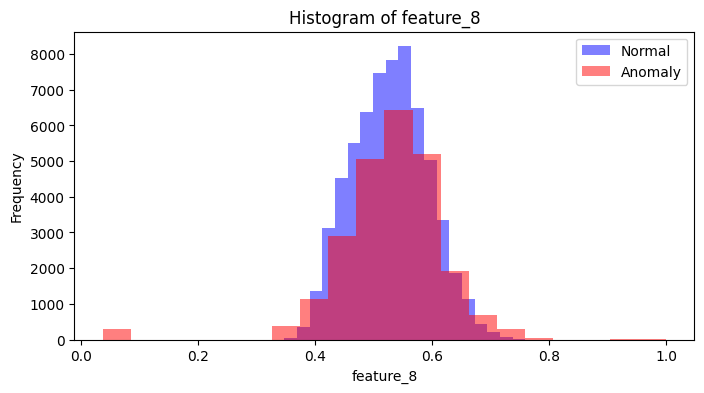

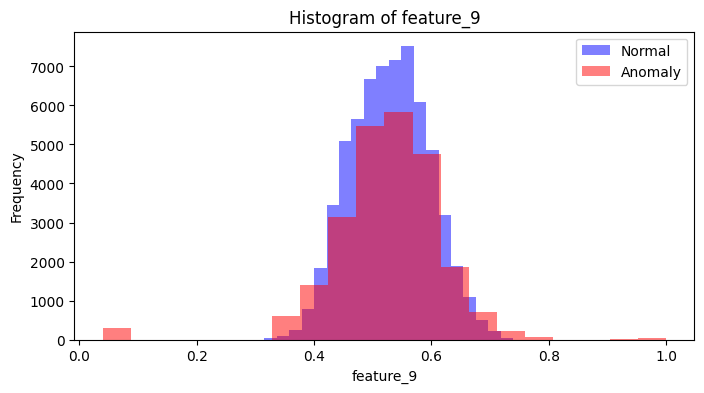

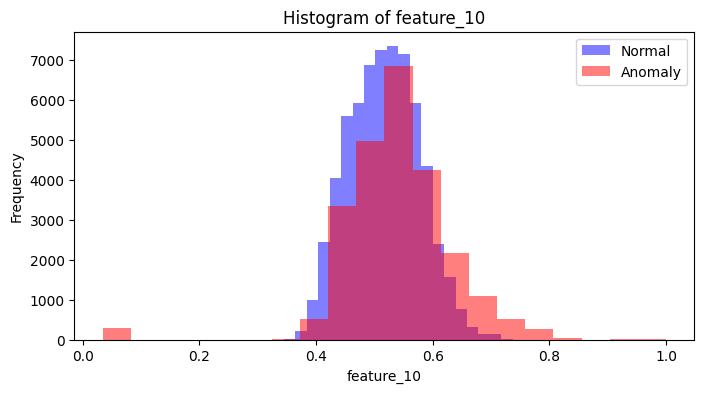

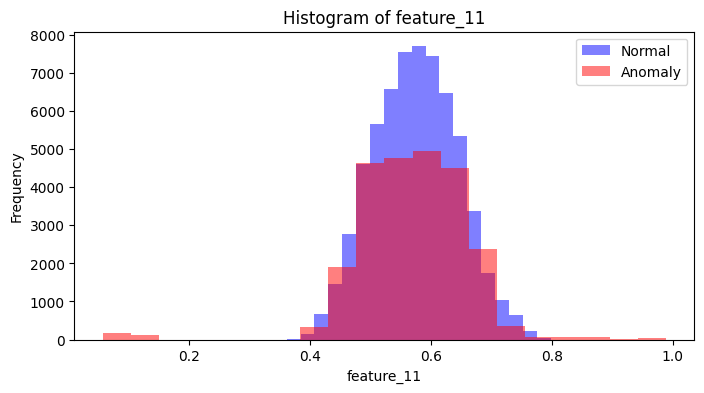

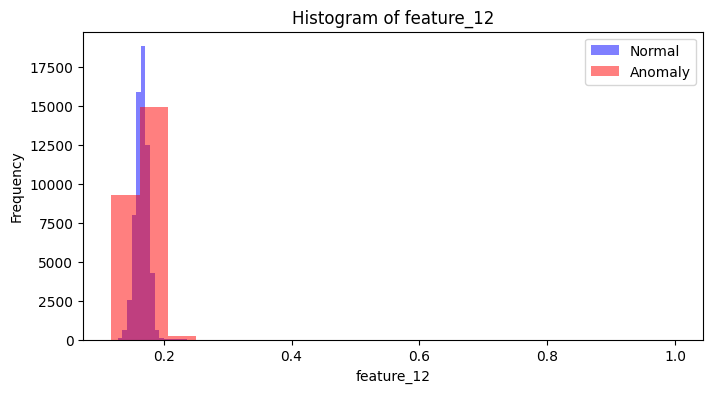

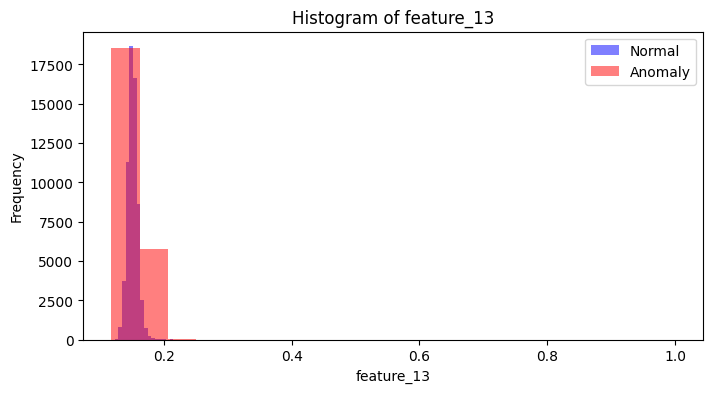

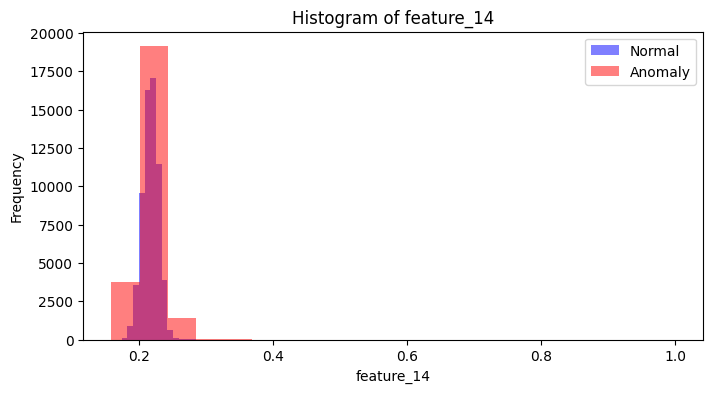

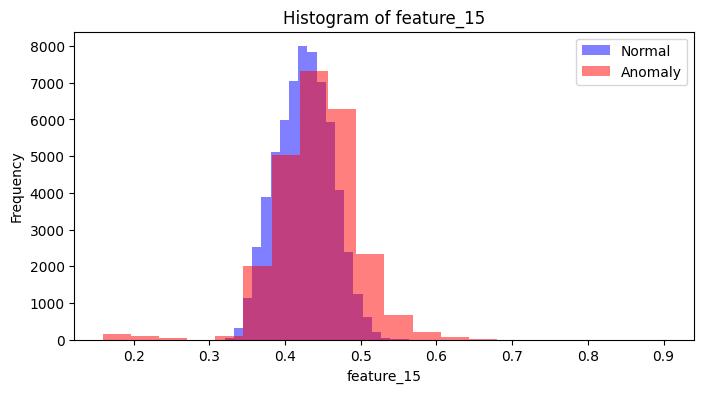

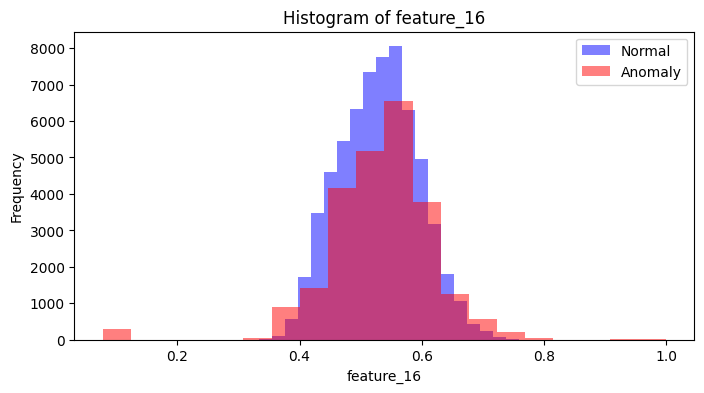

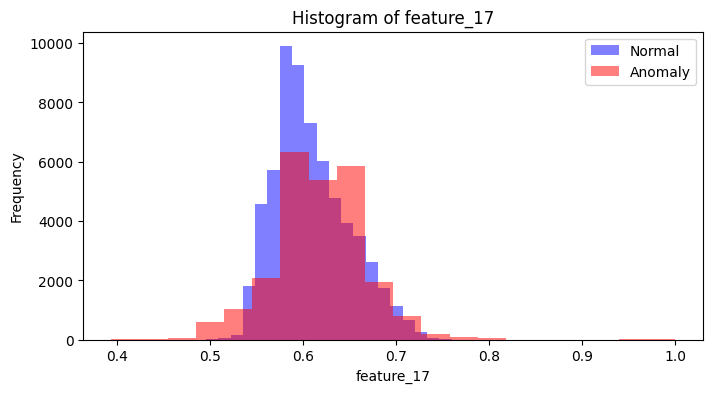

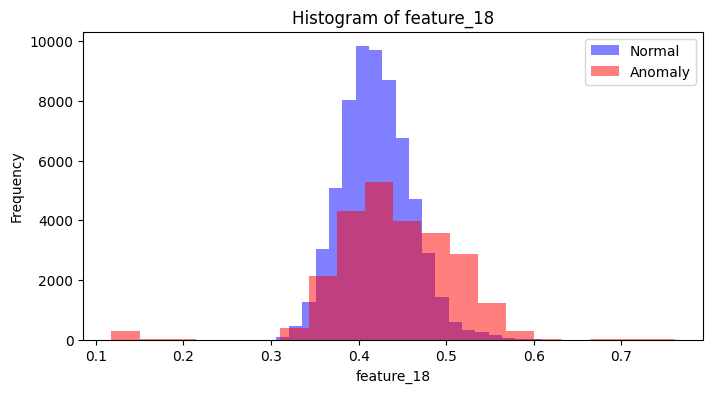

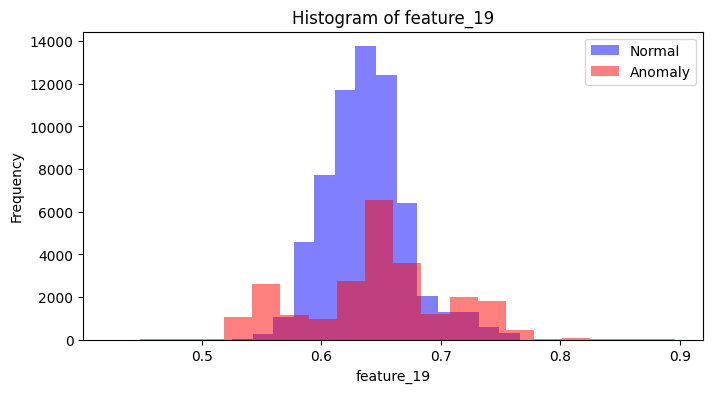

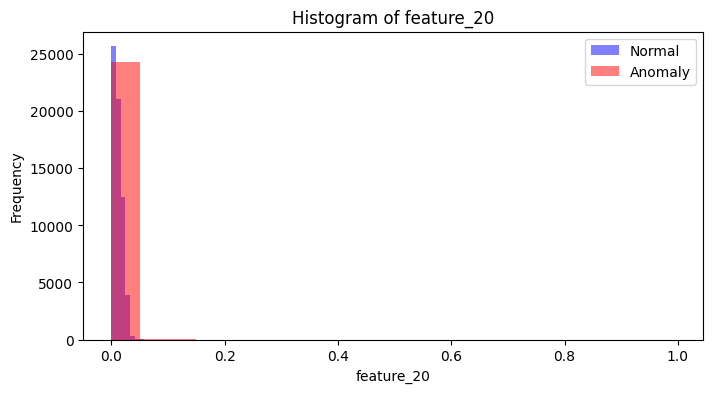

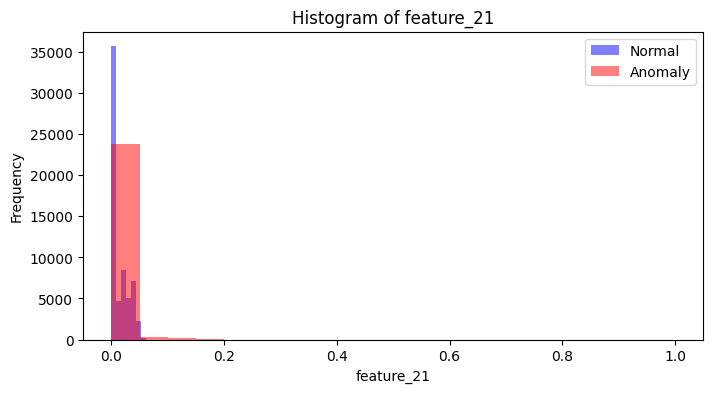

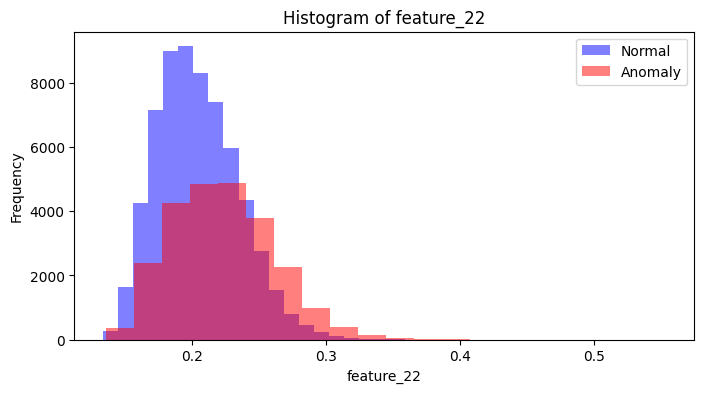

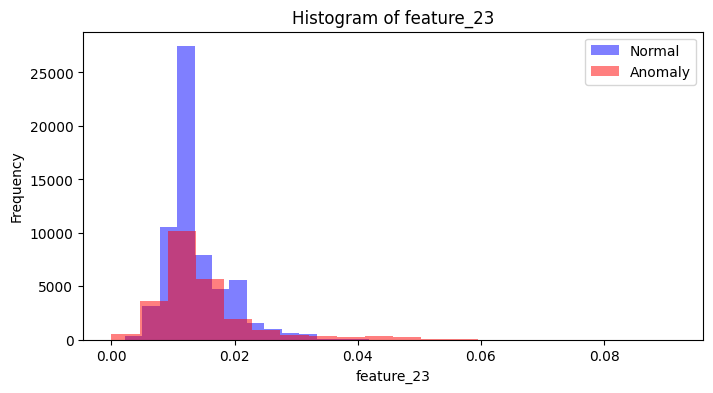

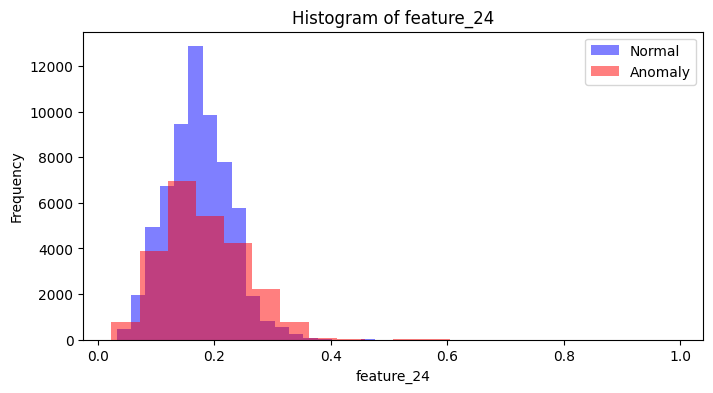

In [42]:
# Histograms for normal and anomaly regions
for column in data.columns[:-1]:  # Exclude 'label' column
    plt.figure(figsize=(8, 4))
    plt.hist(data[data['label'] == 0][column], bins=20, alpha=0.5, color='blue', label='Normal')
    plt.hist(data[data['label'] == 1][column], bins=20, alpha=0.5, color='red', label='Anomaly')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.legend()
    plt.show()


##**4. Correlation Analysis:**

Correlation analysis helps identify relationships between different features in our dataset. Features that are highly correlated with the target variable (or with each other) may play a significant role in detecting anomalies.

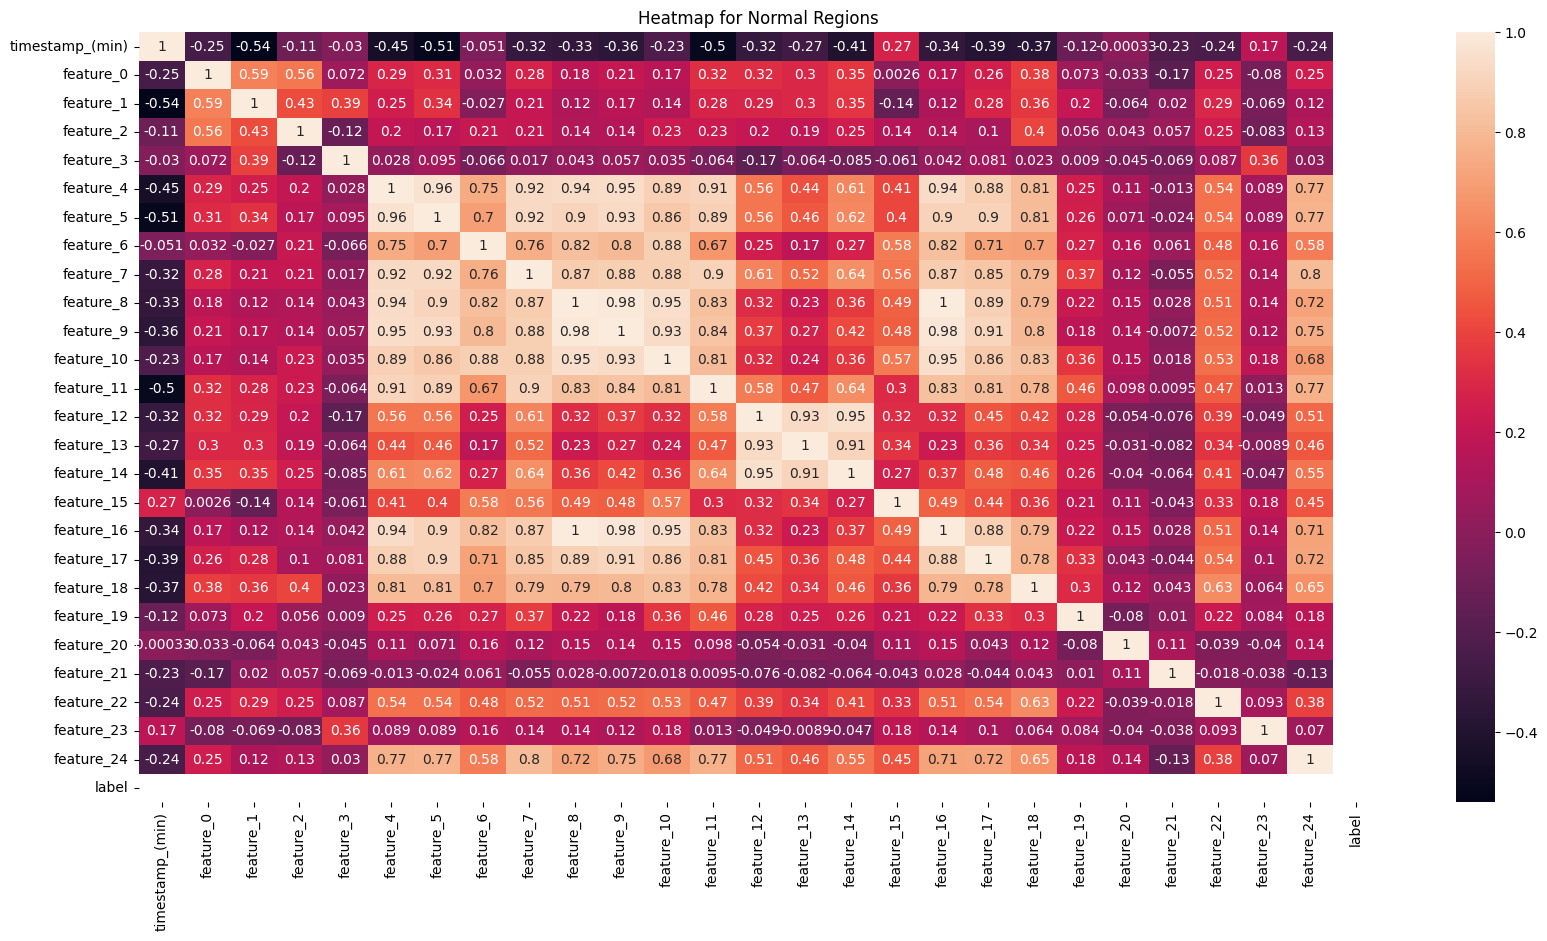

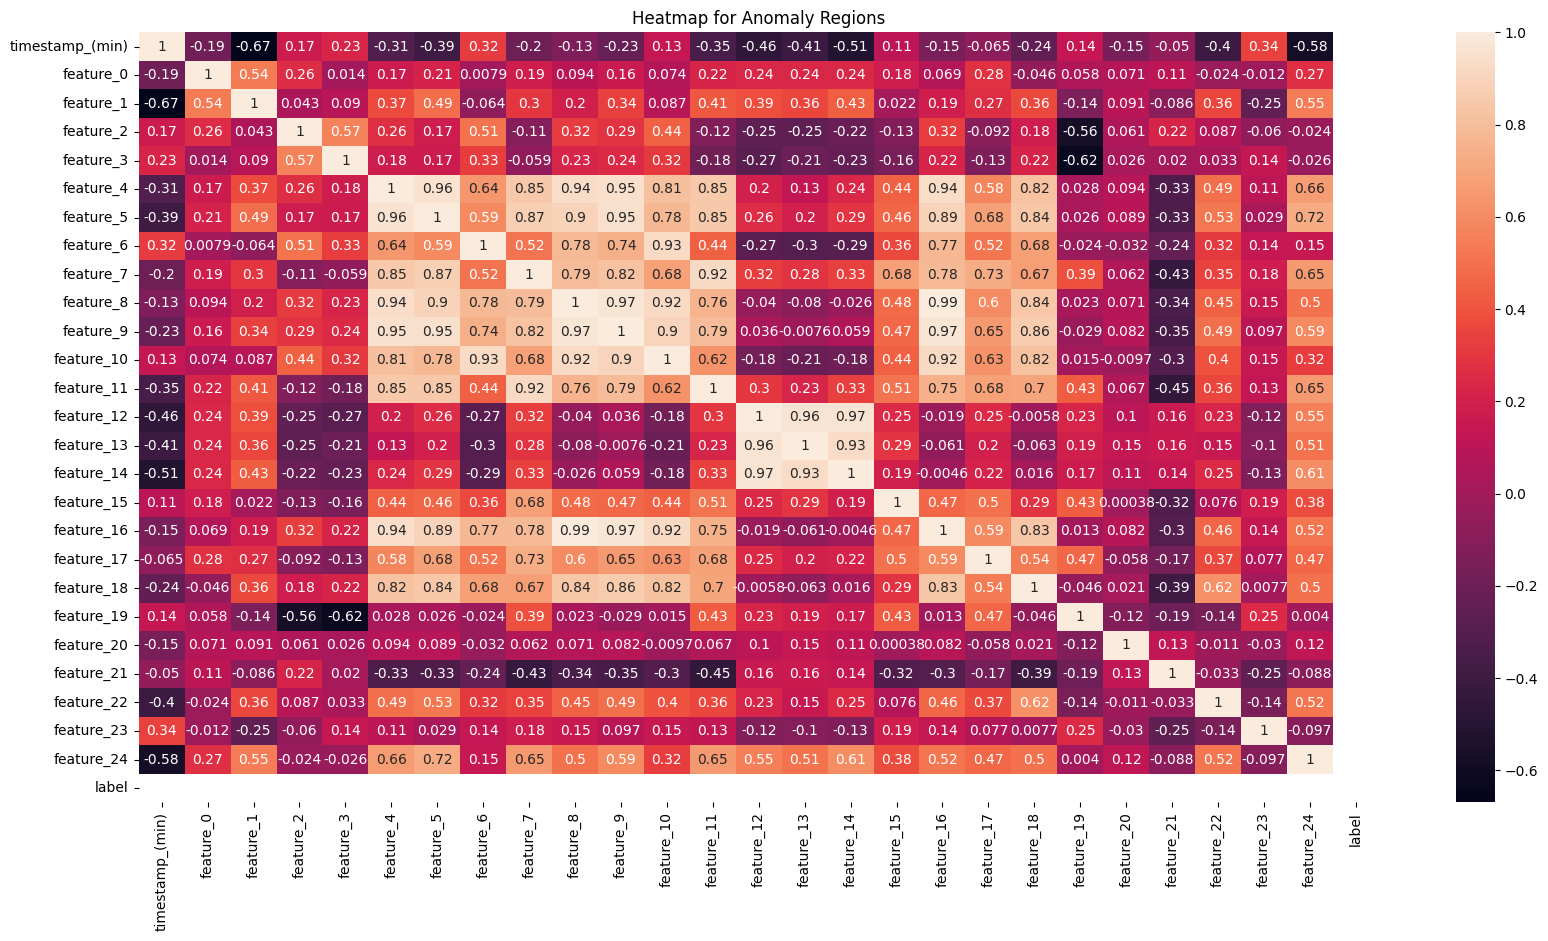

In [49]:
# Correlation matrix for normal regions
plt.figure(figsize=(20, 10))
sns.heatmap(normal_corr, annot=True)
plt.title('Heatmap for Normal Regions')
plt.show()

# Correlation matrix for anomaly regions
plt.figure(figsize=(20, 10))
sns.heatmap(anomaly_corr, annot=True)
plt.title('Heatmap for Anomaly Regions')
plt.show()


##**4. Time Series Analysis:**

Time series analysis helps in understanding temporal patterns and trends in your data over time. Anomalies often manifest as deviations from these patterns, such as sudden spikes or drops in values.

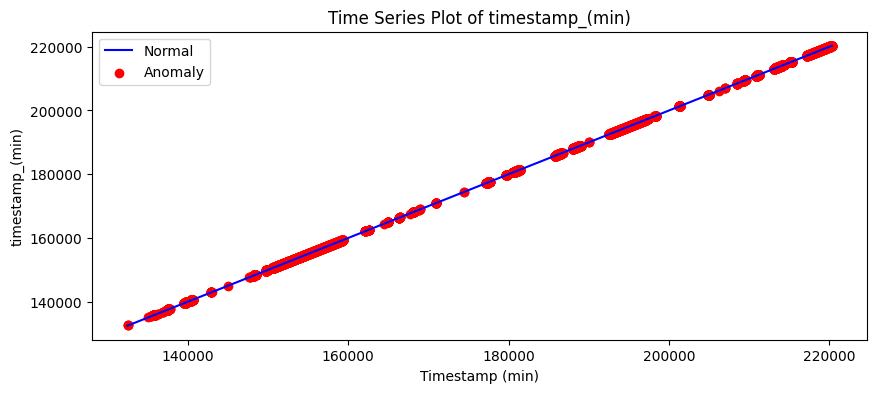

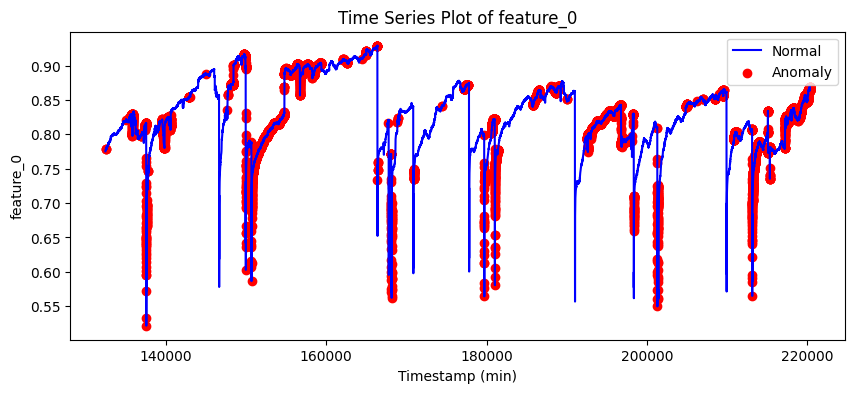

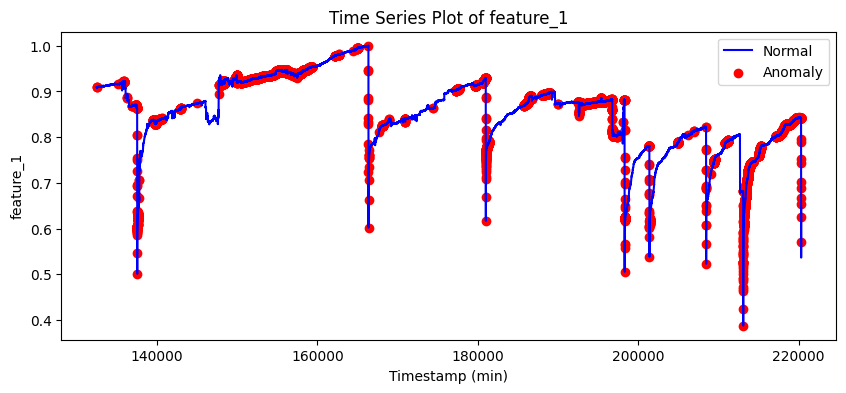

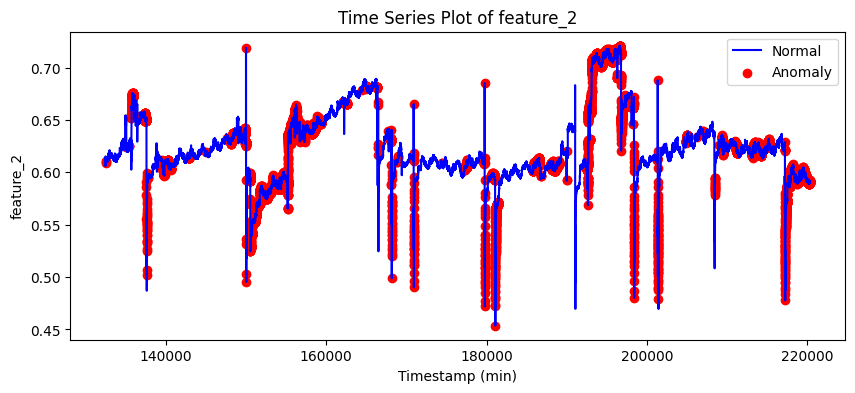

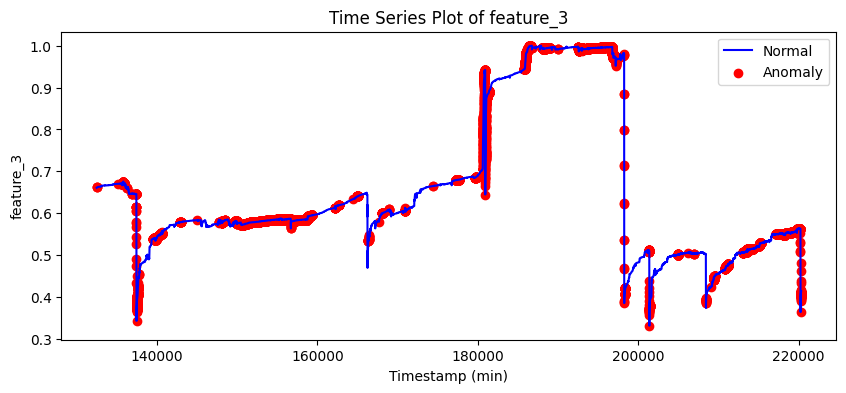

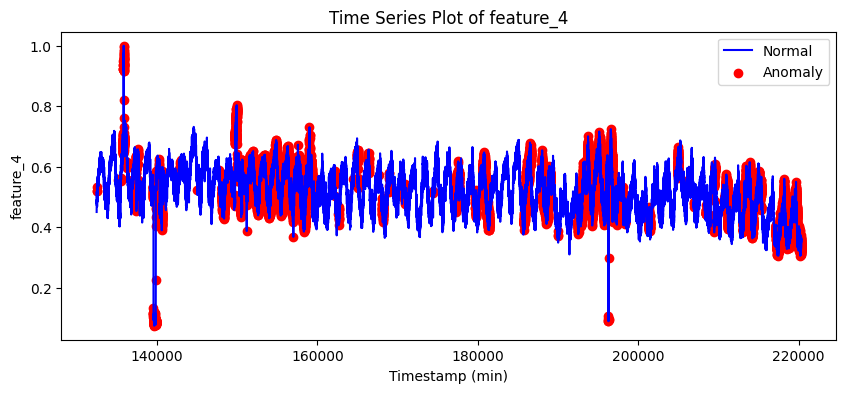

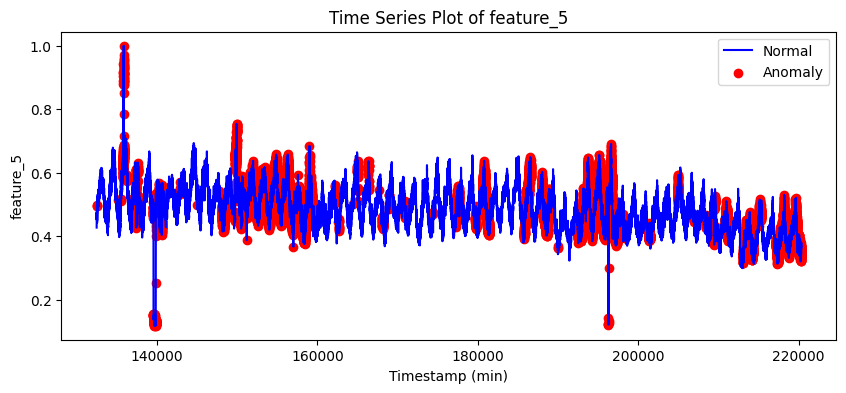

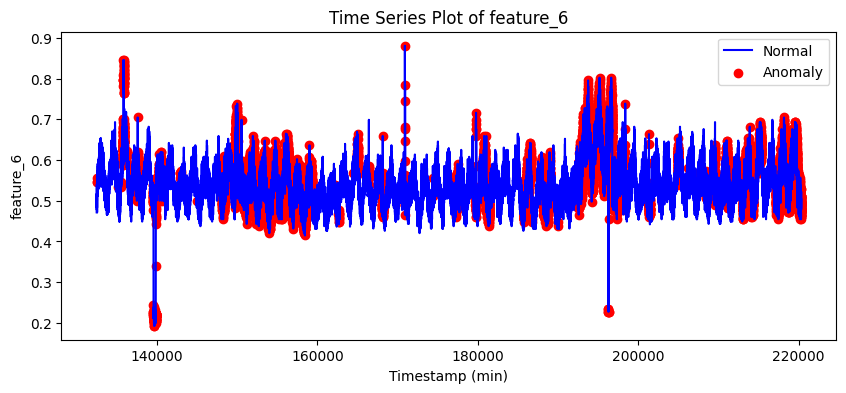

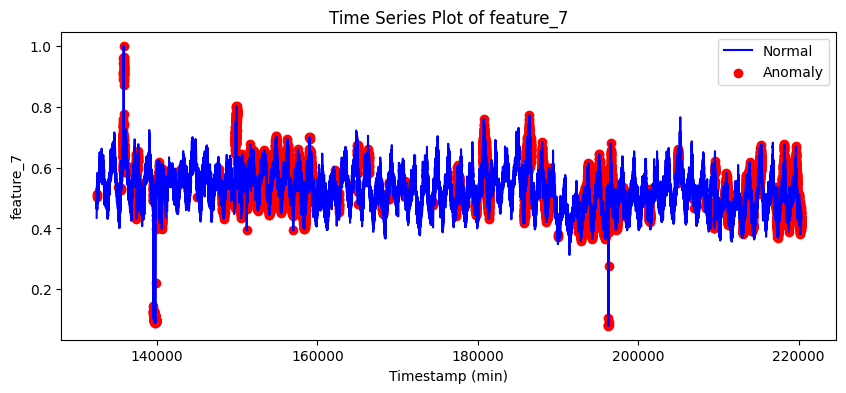

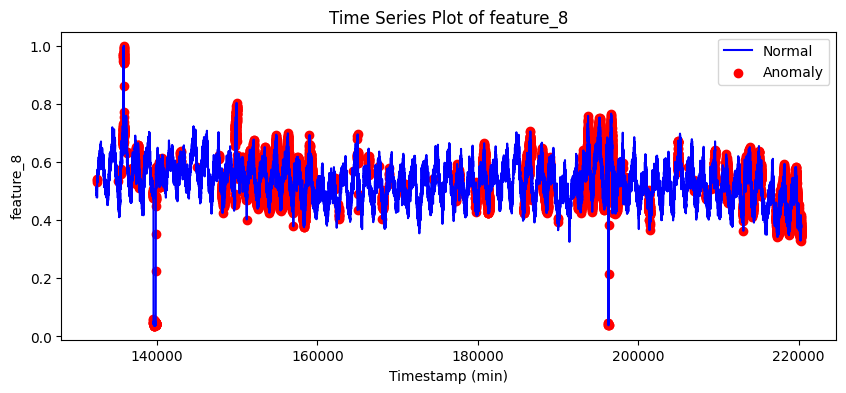

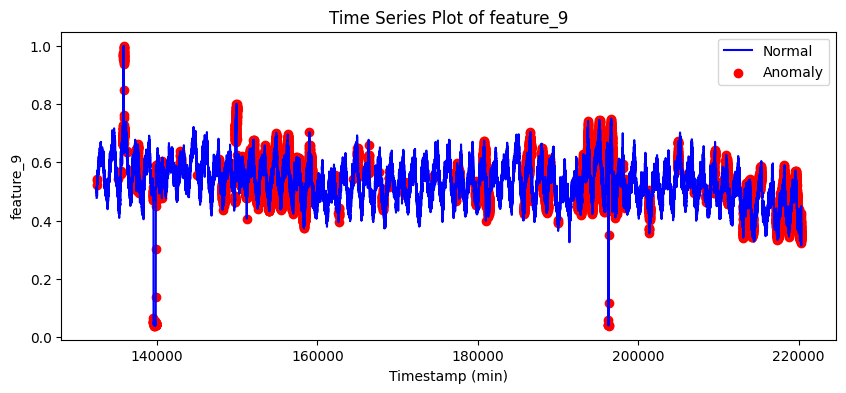

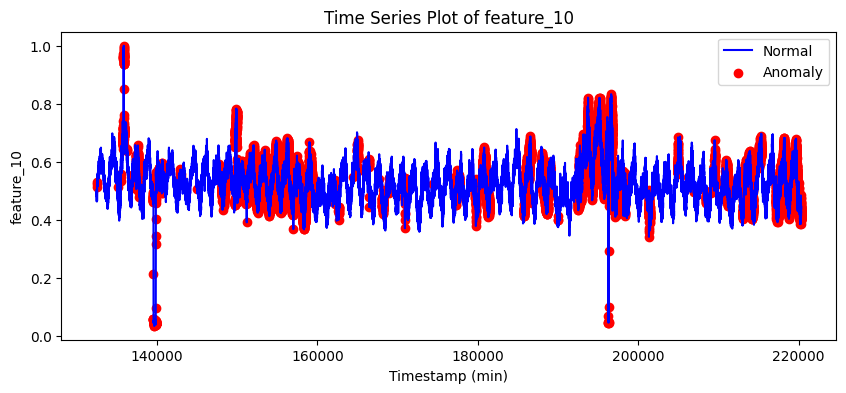

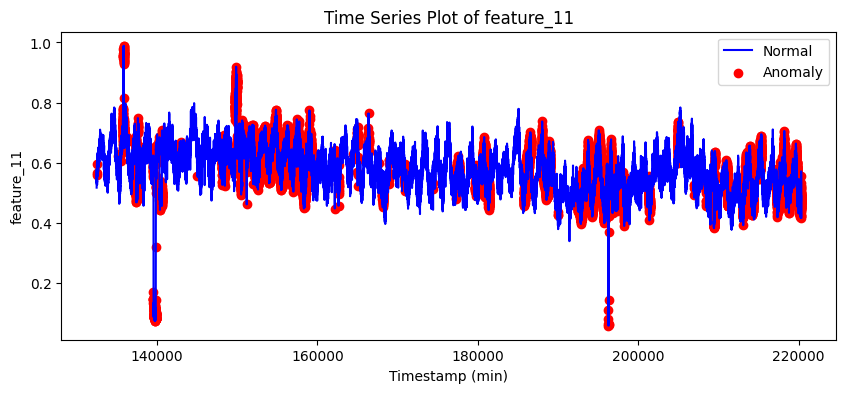

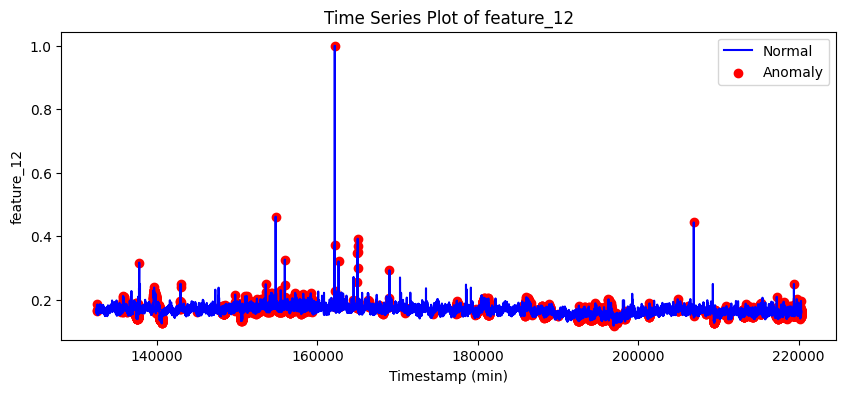

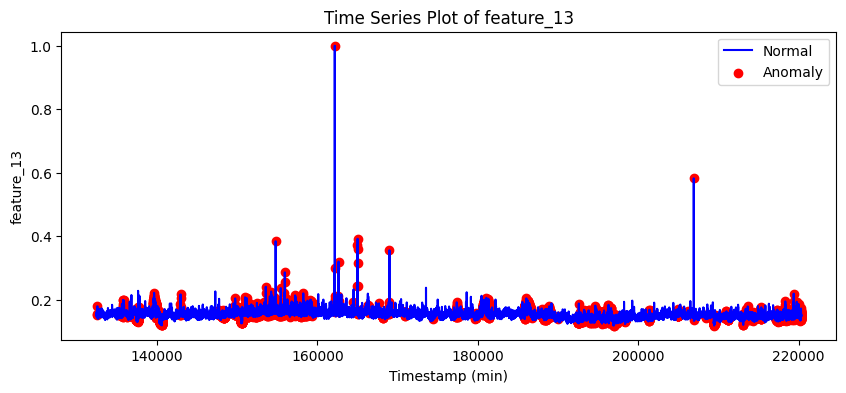

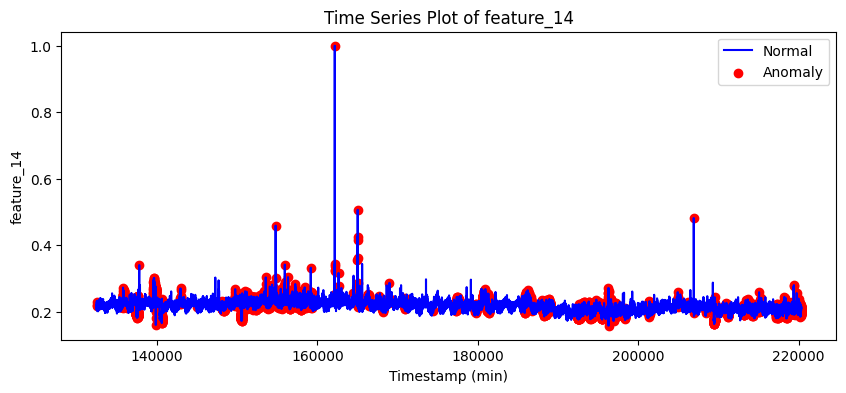

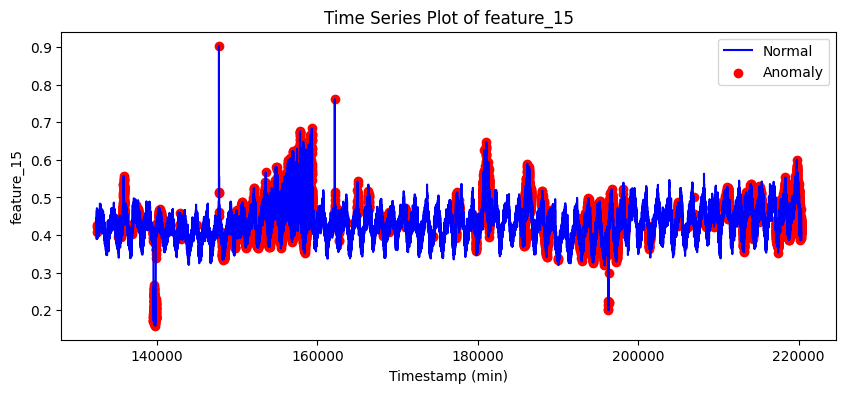

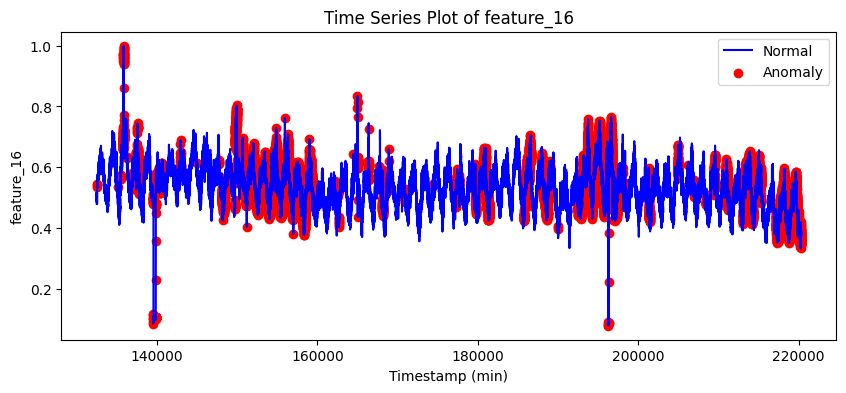

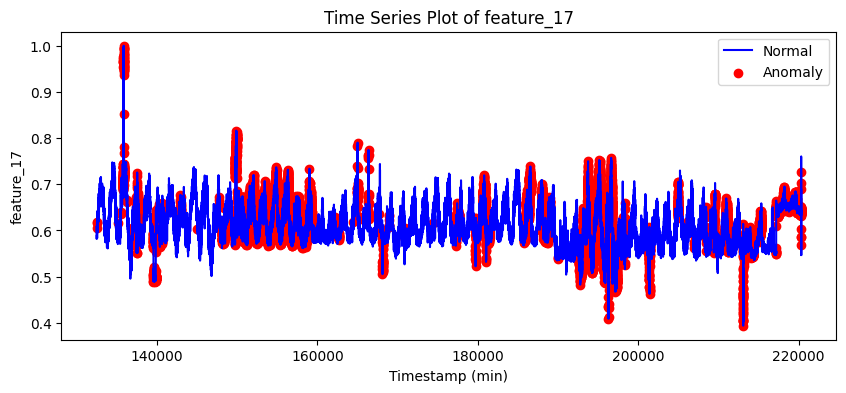

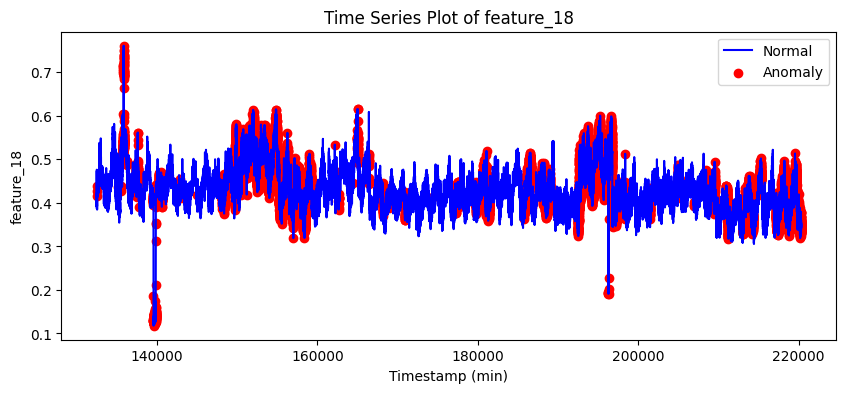

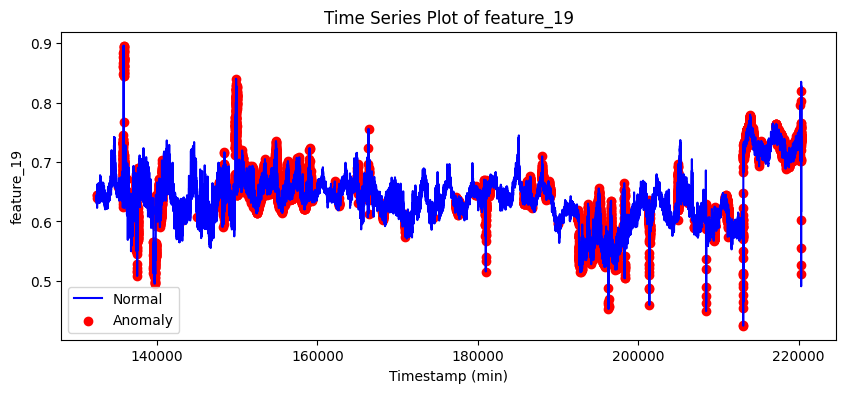

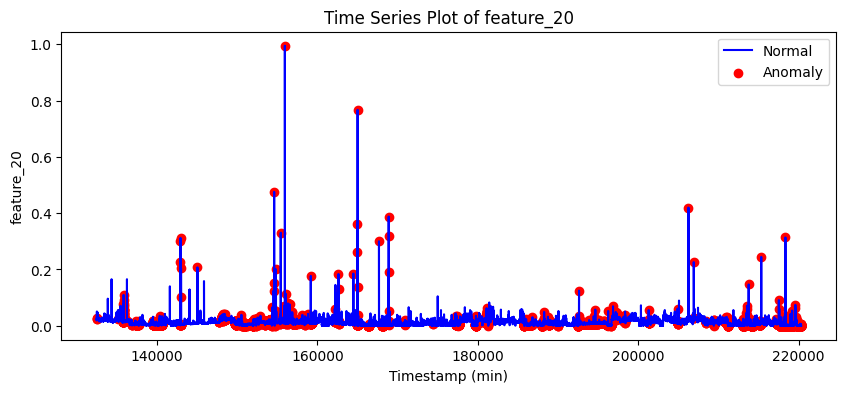

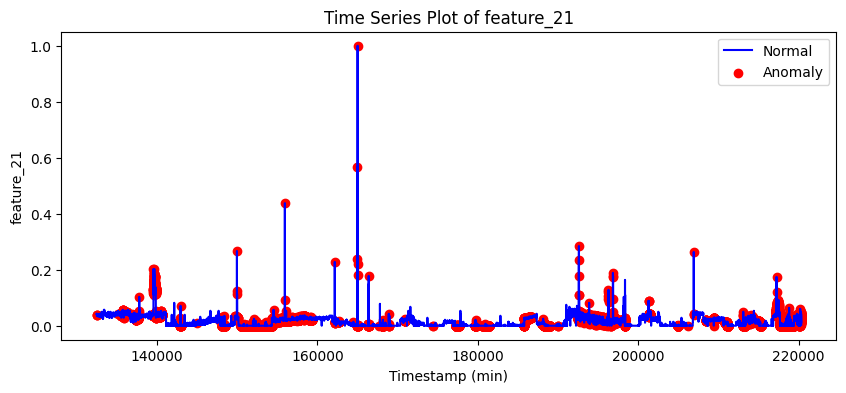

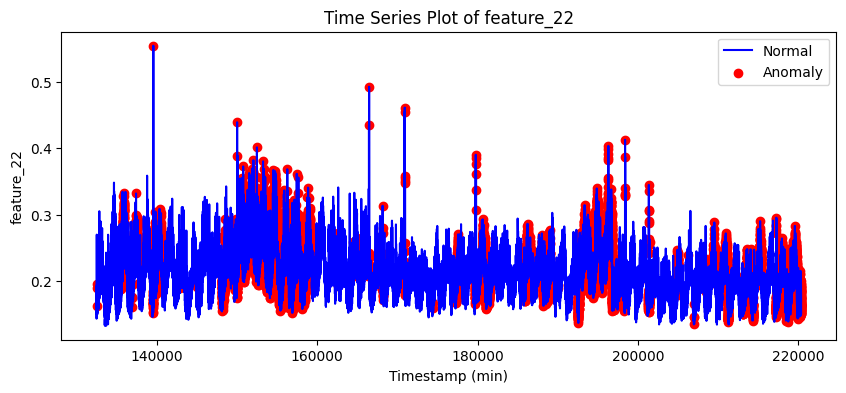

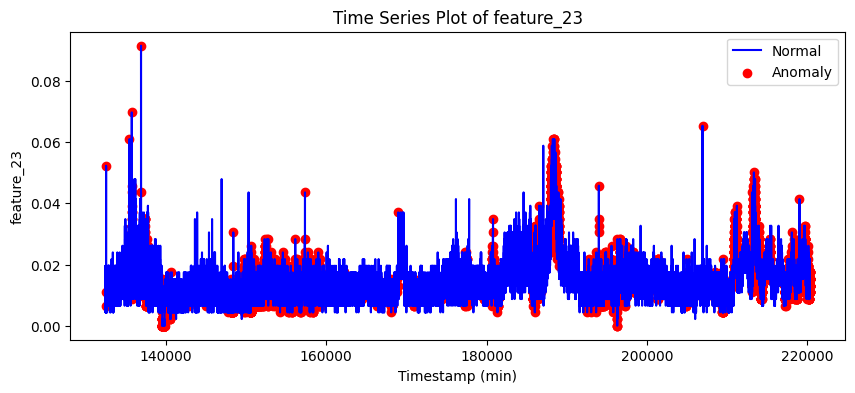

In [50]:
for column in data.columns[:-2]:  # Exclude 'timestamp_(min)' and 'label' columns
    plt.figure(figsize=(10, 4))
    plt.plot(data['timestamp_(min)'], data[column], color='blue', label='Normal')
    plt.scatter(data[data['label'] == 1]['timestamp_(min)'], data[data['label'] == 1][column], color='red', label='Anomaly')
    plt.xlabel('Timestamp (min)')
    plt.ylabel(column)
    plt.title('Time Series Plot of ' + column)
    plt.legend()
    plt.show()


## **Finding the root cause for anomaly**

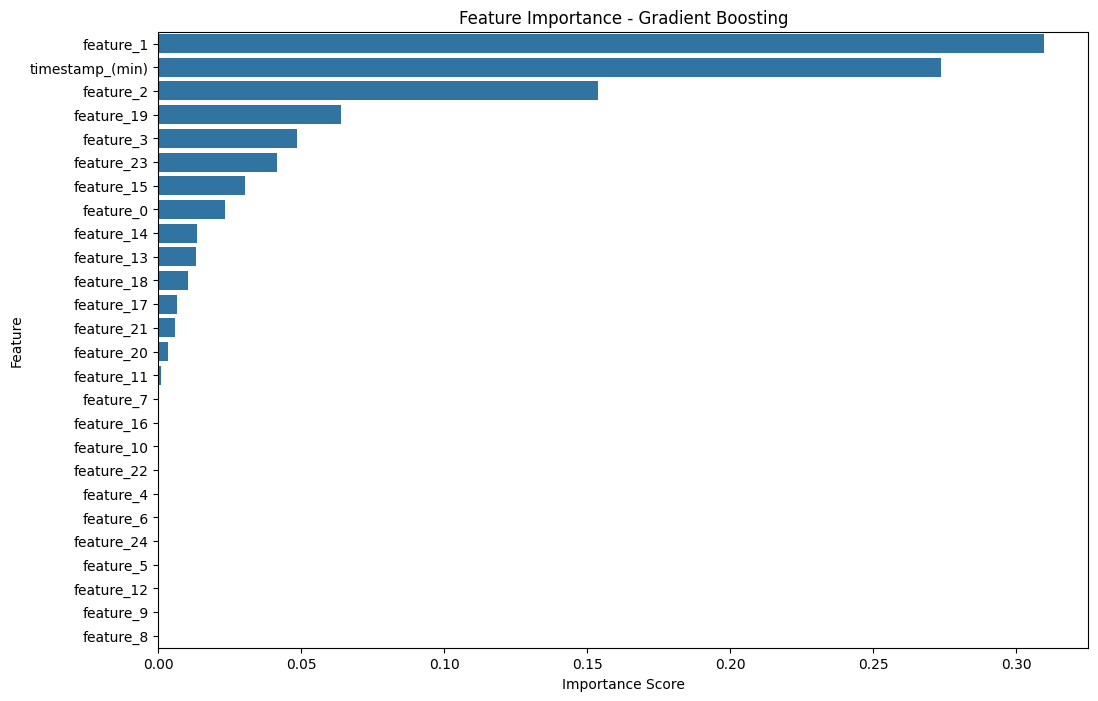

In [52]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X, y)

# Get feature importances
feature_importances_gb = gb_classifier.feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


The variables with bars in the above graph indicate the root cause for the anomaly. Specifically, feature 1, 2, and 19 appear to have the most significant contribution, followed by the other variables as depicted in the graph.